# Descargar librerias

In [1]:
!pip install opendatasets

In [2]:
!pip install kmodes

In [3]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.stats import pearsonr
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_samples
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, pairwise_distances
import itertools
import umap.umap_ as umap
from kmodes.kprototypes import KPrototypes, kmodes
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

In [4]:
od.download("https://www.kaggle.com/datasets/samayashar/startup-growth-and-funding-trends")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: Alejandra Aguilera
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/samayashar/startup-growth-and-funding-trends


100%|██████████| 11.6k/11.6k [00:00<00:00, 24.2MB/s]

# Lectura del dataset

In [5]:
df = pd.read_csv('./startup-growth-and-funding-trends/startup_data.csv')


print(df.head())
print(df.shape)

  Startup Name Industry  Funding Rounds  Funding Amount (M USD)  \
0    Startup_1      IoT               1                  101.09   
1    Startup_2   EdTech               1                  247.62   
2    Startup_3   EdTech               1                  109.24   
3    Startup_4   Gaming               5                   10.75   
4    Startup_5      IoT               4                  249.28   

   Valuation (M USD)  Revenue (M USD)  Employees  Market Share (%)  \
0             844.75            67.87       1468              5.20   
1            3310.83            75.65       3280              8.10   
2            1059.37            84.21       4933              2.61   
3             101.90            47.08       1059              2.53   
4             850.11            50.25       1905              4.09   

   Profitable  Year Founded         Region Exit Status  
0           0          2006         Europe     Private  
1           1          2003  South America     Private  
2    

In [6]:
df.columns

Index(['Startup Name', 'Industry', 'Funding Rounds', 'Funding Amount (M USD)',
       'Valuation (M USD)', 'Revenue (M USD)', 'Employees', 'Market Share (%)',
       'Profitable', 'Year Founded', 'Region', 'Exit Status'],
      dtype='object')

In [7]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Startup Name            500 non-null    object 
 1   Industry                500 non-null    object 
 2   Funding Rounds          500 non-null    int64  
 3   Funding Amount (M USD)  500 non-null    float64
 4   Valuation (M USD)       500 non-null    float64
 5   Revenue (M USD)         500 non-null    float64
 6   Employees               500 non-null    int64  
 7   Market Share (%)        500 non-null    float64
 8   Profitable              500 non-null    int64  
 9   Year Founded            500 non-null    int64  
 10  Region                  500 non-null    object 
 11  Exit Status             500 non-null    object 
dtypes: float64(4), int64(4), object(4)
memory usage: 47.0+ KB


,0
Startup Name,0
Industry,0
Funding Rounds,0
Funding Amount (M USD),0
Valuation (M USD),0
Revenue (M USD),0
Employees,0
Market Share (%),0
Profitable,0
Year Founded,0


In [8]:
df.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,Region,Exit Status
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,Europe,Private
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,South America,Private
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,South America,Private
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,South America,Private
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,Europe,Acquired


#Creando los ratios entre las variables

In [9]:
df_ratios = df.copy()

In [10]:
df_ratios["age"] = 2025 - df_ratios["Year Founded"]

In [11]:
#Valuation / funding
df_ratios["valuation_to_funding"] = (df_ratios["Valuation (M USD)"] / df_ratios["Funding Amount (M USD)"])

In [12]:
# Valuation / Employees
df_ratios["valuation_to_employee"] = (df_ratios["Valuation (M USD)"] / df_ratios["Employees"])

In [13]:
# Funding / Revenue
df_ratios["funding_to_revenue"] = (df_ratios["Funding Amount (M USD)"] / df_ratios["Revenue (M USD)"])


In [14]:
# Growth Efficiency
df_ratios["valuation_to_age"] = (df_ratios["Valuation (M USD)"] / df_ratios["age"])

In [15]:
#Capital Intensity
df_ratios["employees_to_funding"] = (    df_ratios["Employees"] / df_ratios["Funding Amount (M USD)"])

In [16]:
#Employees / Revenue
df_ratios["employees_to_revenue"] = (df_ratios["Employees"] / df_ratios["Revenue (M USD)"])

In [17]:
# Positioning / Premium
df_ratios["valuation_to_market_share"] = (df_ratios["Valuation (M USD)"] / df_ratios["Market Share (%)"])

In [18]:
#Revenue / Employee
df_ratios["revenue_per_employee"] = df_ratios["Revenue (M USD)"] / df_ratios["Employees"]

In [19]:
#Valuation / Revenue
df_ratios["valuation_to_revenue"] = df_ratios["Valuation (M USD)"] / df_ratios["Revenue (M USD)"]

In [20]:
#Revenue / Mart Share
df_ratios["revenue_per_market_share"] = df_ratios["Revenue (M USD)"] / df_ratios["Market Share (%)"].replace(0, 1)

In [21]:
#Funding Rouds / Year
df_ratios["funding_rounds_per_year"] = df_ratios["Funding Rounds"] / df_ratios["age"].replace(0, 1)

In [22]:
df_ratios.head()

,Startup Name,Industry,Funding Rounds,Funding Amount (M USD),Valuation (M USD),Revenue (M USD),Employees,Market Share (%),Profitable,Year Founded,...,valuation_to_employee,funding_to_revenue,valuation_to_age,employees_to_funding,employees_to_revenue,valuation_to_market_share,revenue_per_employee,valuation_to_revenue,revenue_per_market_share,funding_rounds_per_year
0,Startup_1,IoT,1,101.09,844.75,67.87,1468,5.20,0,2006,...,0.575443,1.489465,44.460526,14.521713,21.629586,162.451923,0.046233,12.446589,13.051923,0.052632
1,Startup_2,EdTech,1,247.62,3310.83,75.65,3280,8.10,1,2003,...,1.009399,3.273232,150.492273,13.246103,43.357568,408.744444,0.023064,43.765102,9.339506,0.045455
2,Startup_3,EdTech,1,109.24,1059.37,84.21,4933,2.61,1,1995,...,0.214752,1.297233,35.312333,45.157451,58.579741,405.888889,0.017071,12.580097,32.264368,0.033333
3,Startup_4,Gaming,5,10.75,101.90,47.08,1059,2.53,0,2003,...,0.096223,0.228335,4.631818,98.511628,22.493628,40.276680,0.044457,2.164401,18.608696,0.227273
4,Startup_5,IoT,4,249.28,850.11,50.25,1905,4.09,0,1997,...,0.446252,4.960796,30.361071,7.642009,37.910448,207.850856,0.026378,16.917612,12.286064,0.142857


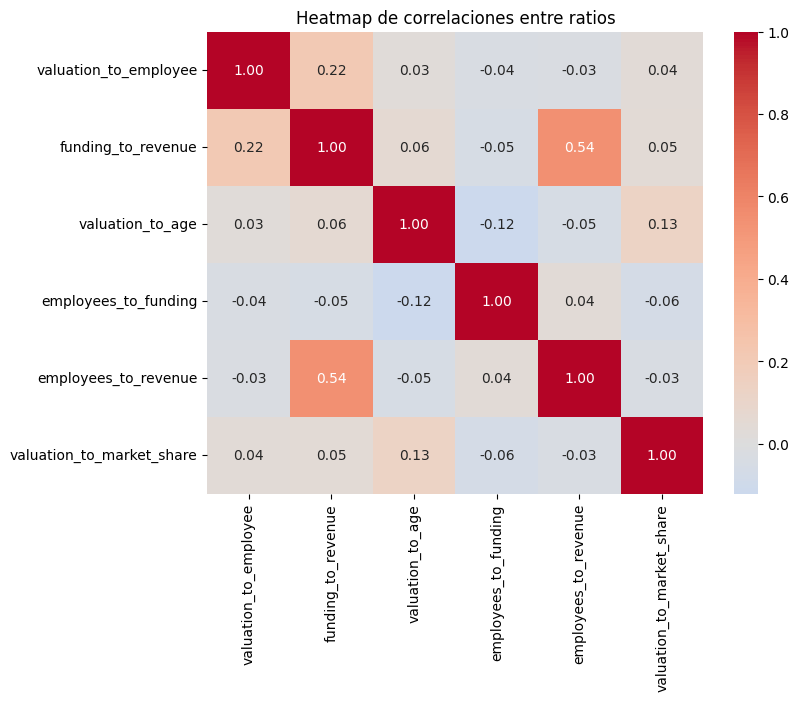

In [23]:
# Filtrar solo las columnas de ratios
ratio_cols = [
    "valuation_to_employee", "funding_to_revenue", "valuation_to_age",
    "employees_to_funding", "employees_to_revenue", "valuation_to_market_share"
]

# Matriz de correlación (Pearson)
corr_matrix = df_ratios[ratio_cols].corr(method="pearson")

# Graficar heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0, fmt=".2f")
plt.title("Heatmap de correlaciones entre ratios")
plt.show()

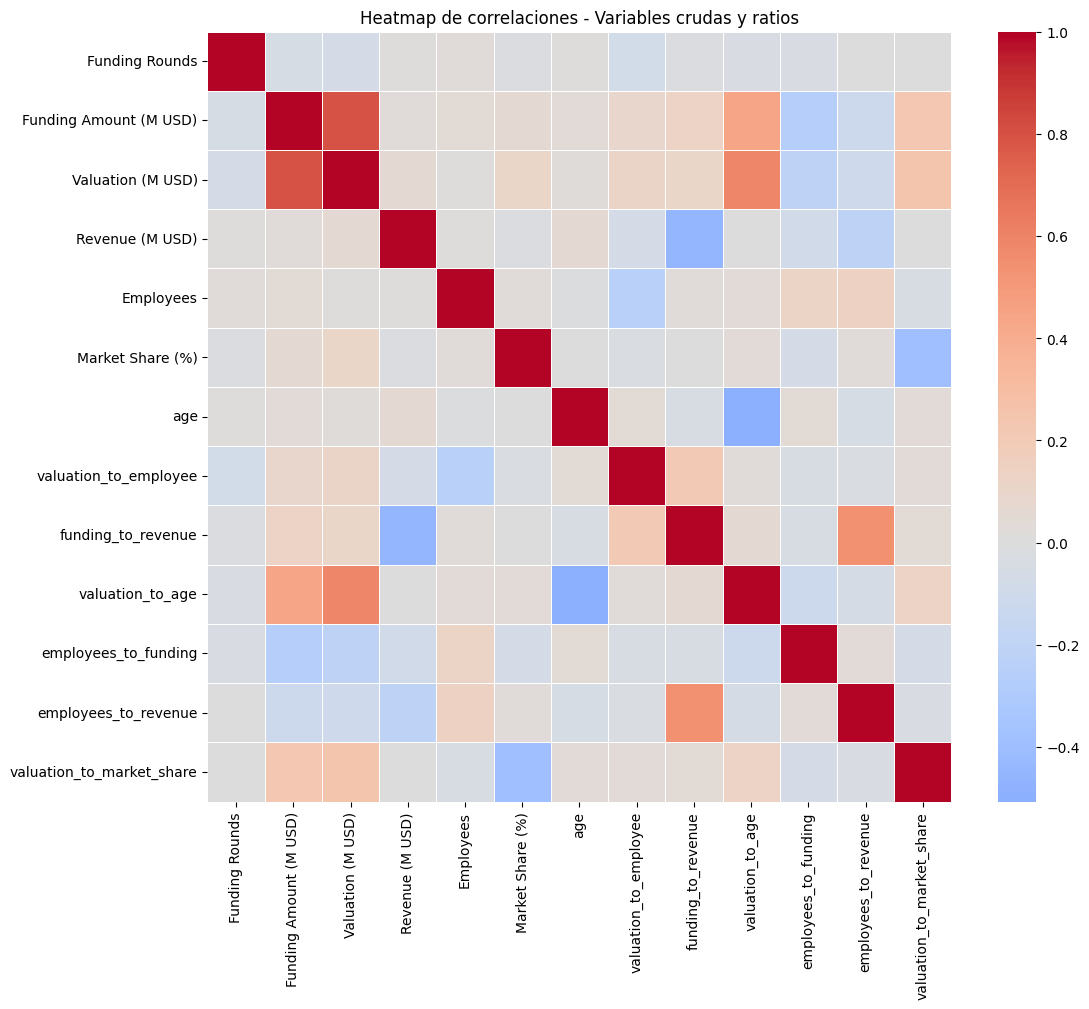

In [24]:
# Seleccionamos todas las columnas numéricas (crudas + ratios)
num_all = [
    "Funding Rounds", "Funding Amount (M USD)", "Valuation (M USD)",
    "Revenue (M USD)", "Employees", "Market Share (%)", "age",
    "valuation_to_employee", "funding_to_revenue", "valuation_to_age",
    "employees_to_funding", "employees_to_revenue", "valuation_to_market_share"
]

# Calcular matriz de correlación
corr_matrix_all = df_ratios[num_all].corr(method="pearson")

# Graficar heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix_all, annot=False, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Heatmap de correlaciones - Variables crudas y ratios")
plt.show()


Funding Amount – Valuation – Revenue

Se ven muy correlacionados entre sí (bloques rojos).

No tiene sentido meter los tres como “fuente de tamaño absoluto”, porque están transmitiendo información parecida.

Podrías quedarte solo con 1 o 2 (ej: Funding + Revenue).

Employees

Tiene correlaciones bajas/negativas con varios ratios (ej: con valuation_to_employee).

Eso significa que Employees aporta una perspectiva distinta (tamaño de organización).

Ratios de eficiencia

funding_to_revenue y employees_to_revenue tienen correlación moderada (~0.5).

Son similares, pero no idénticos → puedes quedarte con uno, o con ambos si quieres reforzar “eficiencia vs productividad”.

valuation_to_age

Tiene correlación con Valuation y Age (era esperable).

Pero no está tan ligado a otros ratios → aporta escalabilidad en el tiempo, conviene mantenerlo.

valuation_to_market_share

Casi no está correlacionado con nada.

Puede ser muy informativo, ya que captura si la valuación se explica por el dominio de mercado o por expectativas.

employees_to_funding

Casi todo gris/azul (correlaciones bajas o negativas).

Parece independiente → útil para medir intensidad de capital humano.

# Clustering
## K-Means

In [25]:
# Estilo
sns.set(style="white")

In [26]:
#Escogiendo las variables númericas para el K-Means
numeric_base = [
    'Funding Rounds',
    'Funding Amount (M USD)',
    'Revenue (M USD)',
    'Market Share (%)',
    'Employees',
    'Year Founded'
]

numeric_derived = [
    'Valuation_to_Funding_Ratio',
    'Revenue_per_MS',
    'Company_Age'
]

categorical = ['Industry', 'Region']

# Columnas a a excluir del clustering - No quiero ni la variable objetivo Profitable, ni el nombre de las Startups
drop_cols = ['Startup Name', 'Exit Status', 'Profitable', 'Valuation (M USD)']

In [27]:
#Datos para el clustering
use_cols = numeric_base + numeric_derived + categorical
use_cols = [c for c in use_cols if c in df.columns]

X = df[use_cols].copy()

#Standar Scaler para varaibles numpericas
num_cols = [c for c in X.columns if c not in categorical]
cat_cols = categorical

numeric_pipe = Pipeline([('scaler', StandardScaler())])

#One hot ecogind para variables categoricas
categorical_pipe = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
pre = ColumnTransformer([('num', numeric_pipe, num_cols),('cat', categorical_pipe, cat_cols)])

###Método del codo - KMeans

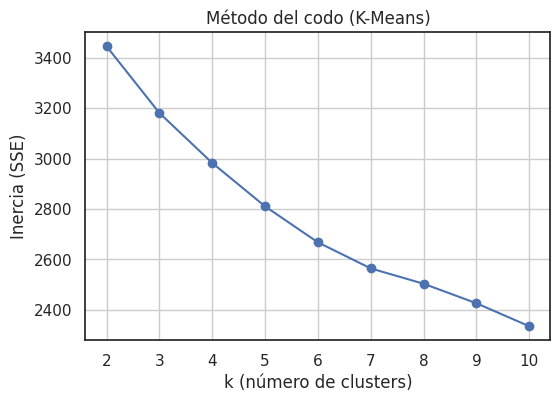

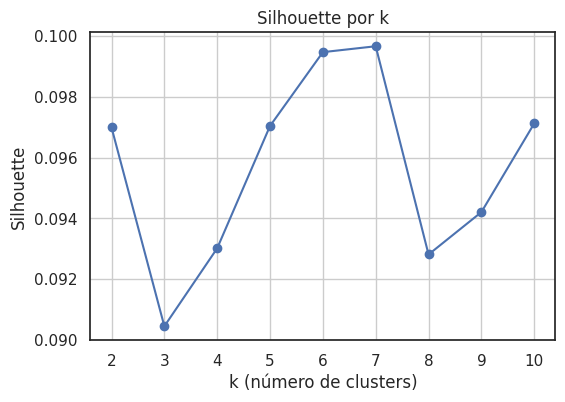

,k,inertia,silhouette
0,2,3444.743888,0.097001
1,3,3180.603083,0.090449
2,4,2982.450610,0.093018
3,5,2810.535106,0.097049
4,6,2667.957042,0.099481
5,7,2564.549274,0.099676
6,8,2503.837714,0.092813
7,9,2426.556876,0.094210
8,10,2335.405049,0.097132


In [28]:
# Transformación
X_pre = pre.fit_transform(X)

ks = range(2, 11)
inertias = []
silhouettes = []

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_pre)
    inertias.append(km.inertia_)
    silhouettes.append(silhouette_score(X_pre, labels))

#Grafica Elbow - codo
plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker='o')
plt.title('Método del codo (K-Means)')
plt.xlabel('k (número de clusters)')
plt.ylabel('Inercia (SSE)')
plt.grid(True)
plt.show()

#Grafica Silhouette
plt.figure(figsize=(6,4))
plt.plot(list(ks), silhouettes, marker='o')
plt.title('Silhouette por k')
plt.xlabel('k (número de clusters)')
plt.ylabel('Silhouette')
plt.grid(True)
plt.show()

pd.DataFrame({'k': ks, 'inertia': inertias, 'silhouette': silhouettes})

### KMeans - para k = 2 - Profitable - No Profitable

In [29]:
df_cluster = df_ratios

In [30]:
#Variables a usar
df_cluster = df_ratios[["Industry", "valuation_to_funding", "age", "Profitable"]].copy()

#Preprocesamiento: One-Hot para Industry y escalado para numéricas
numeric_features = ["valuation_to_funding", "age"]
categorical_features = ["Industry"]

preprocessor = ColumnTransformer(
    transformers=[("num", StandardScaler(), numeric_features),("cat", OneHotEncoder(drop="first"), categorical_features)])

#Modelo de clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

pipeline = Pipeline(steps=[("preprocessor", preprocessor),("clusterer", kmeans)])

#Entrenamiento
pipeline.fit(df_cluster)

#Asignar clusters
df_cluster["cluster"] = pipeline["clusterer"].labels_

#Evaluar silhouette
X_transformed = pipeline["preprocessor"].transform(df_cluster)
sil_score = silhouette_score(X_transformed, df_cluster["cluster"])

print(f"Silhouette Score: {sil_score:.3f}")

#Comparar con Profitable
crosstab = pd.crosstab(df_cluster["cluster"], df_cluster["Profitable"])
print("\nDistribución de Profitable por cluster:")
print(crosstab)

#Evaluar el porcentaje de acierto si quisiéramos clasificar
accuracy = max(
    (df_cluster["cluster"] == df_cluster["Profitable"]).mean(),(1 - (df_cluster["cluster"] == df_cluster["Profitable"]).mean()))
print(f"\nPorcentaje de alineación con Profitable: {accuracy:.2%}")

Silhouette Score: 0.246

Distribución de Profitable por cluster:
Profitable    0    1
cluster             
0           151   94
1           133  122

Porcentaje de alineación con Profitable: 54.60%


Silhouette Score muy bajo - y la separaión de protiable y non-profitable no es difusa

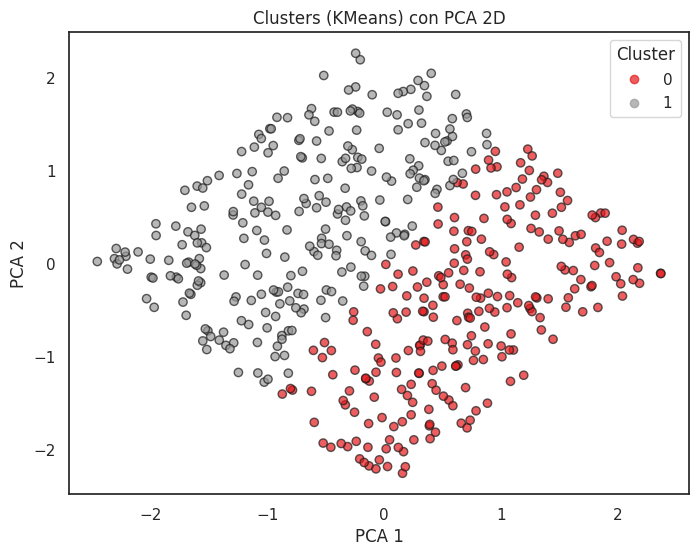

In [31]:
# Preprocesador del pipeline para transformar los datos
X_transformed = pipeline["preprocessor"].transform(df_cluster)

# Reducimos a 2D con PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_transformed)

# Graficamos clusters
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=df_cluster["cluster"],
    cmap="Set1",
    alpha=0.7,
    edgecolor="k"
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Clusters (KMeans) con PCA 2D")
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()

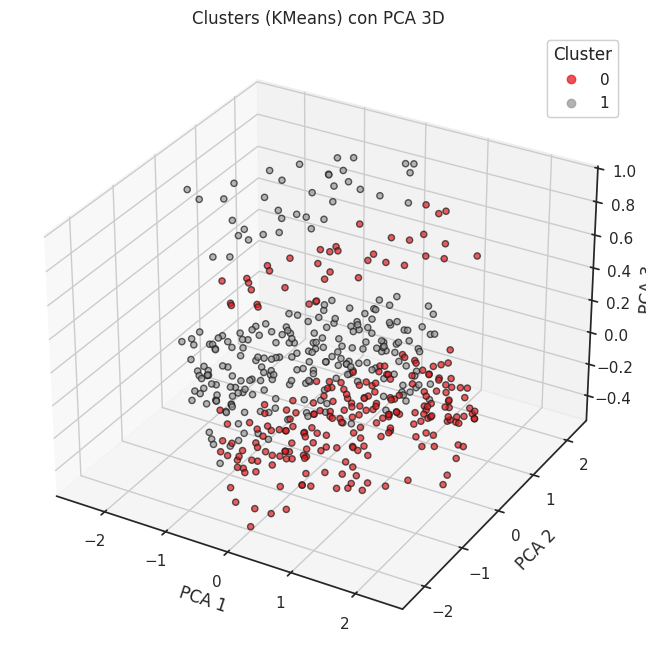

In [32]:
# Reducimos a 3D con PCA
pca = PCA(n_components=3, random_state=42)
X_pca_3d = pca.fit_transform(X_transformed)

# Graficamos en 3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")

scatter = ax.scatter(
    X_pca_3d[:, 0],
    X_pca_3d[:, 1],
    X_pca_3d[:, 2],
    c=df_cluster["cluster"],
    cmap="Set1",
    alpha=0.7,
    edgecolor="k"
)

ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.set_title("Clusters (KMeans) con PCA 3D")
legend1 = ax.legend(*scatter.legend_elements(), title="Cluster")
ax.add_artist(legend1)

plt.show()

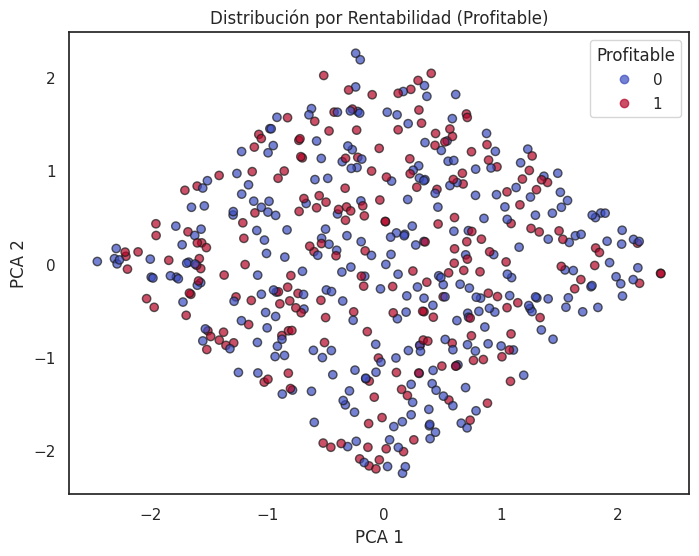

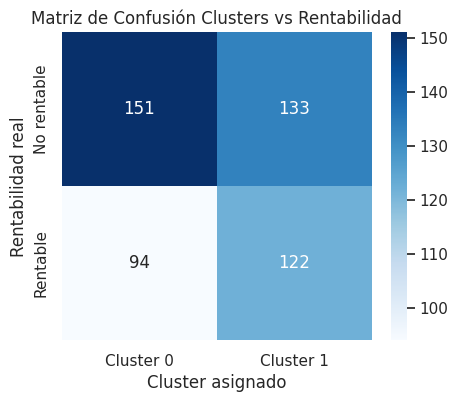

In [33]:
#Revisando si es posible diferencias renatble y no rentable
#Graficar y matriz de confusión
plt.figure(figsize=(8,6))
scatter = plt.scatter(
    X_pca[:, 0], X_pca[:, 1],
    c=df_cluster["Profitable"],
    cmap="coolwarm",
    alpha=0.7,
    edgecolor="k"
)

plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Distribución por Rentabilidad (Profitable)")
plt.legend(*scatter.legend_elements(), title="Profitable")
plt.show()

#Matriz de confusión
cm = confusion_matrix(df_cluster["Profitable"], df_cluster["cluster"])

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cluster 0", "Cluster 1"], yticklabels=["No rentable", "Rentable"])
plt.xlabel("Cluster asignado")
plt.ylabel("Rentabilidad real")
plt.title("Matriz de Confusión Clusters vs Rentabilidad")
plt.show()

In [34]:
df_ratios.columns

Index(['Startup Name', 'Industry', 'Funding Rounds', 'Funding Amount (M USD)',
       'Valuation (M USD)', 'Revenue (M USD)', 'Employees', 'Market Share (%)',
       'Profitable', 'Year Founded', 'Region', 'Exit Status', 'age',
       'valuation_to_funding', 'valuation_to_employee', 'funding_to_revenue',
       'valuation_to_age', 'employees_to_funding', 'employees_to_revenue',
       'valuation_to_market_share', 'revenue_per_employee',
       'valuation_to_revenue', 'revenue_per_market_share',
       'funding_rounds_per_year'],
      dtype='object')

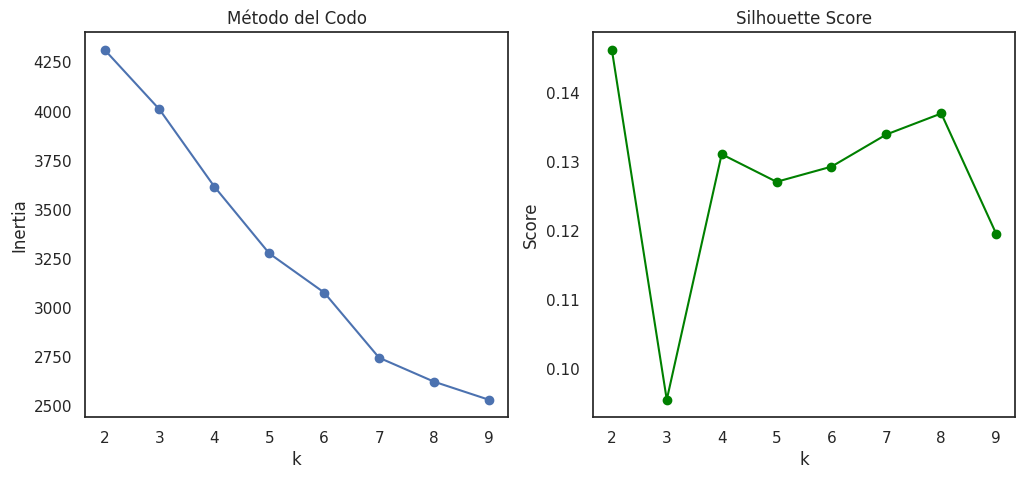

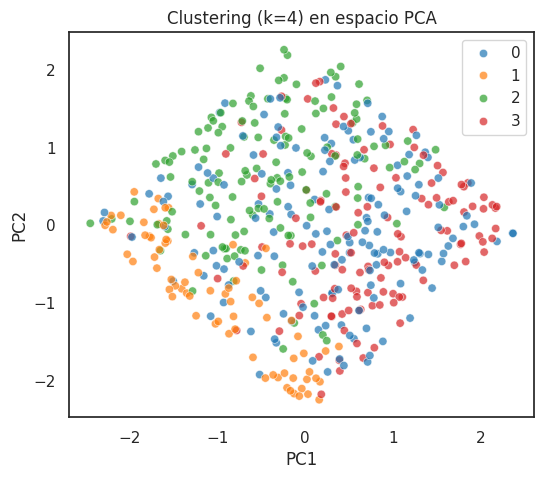

         Revenue (M USD)    Employees  Funding Amount (M USD)  \
Cluster                                                         
0              45.835886  2082.107595               67.528671   
1              41.698243  2774.527027              141.428649   
2              49.797071  2474.250000              225.773643   
3              57.512031  3010.648438              184.256406   

         Valuation (M USD)  revenue_per_employee  valuation_to_funding  \
Cluster                                                                  
0               535.707785              0.081673              8.243387   
1              1217.580405              0.027128              9.055494   
2              2523.682786              0.040839             11.384861   
3              1233.173594              0.027414              6.947850   

         Market Share (%)  revenue_per_market_share        age  \
Cluster                                                          
0                5.430823       

In [35]:
#Volvemos a intentar K-Means pero para k=4
features = [
    'Revenue (M USD)',
    'Employees',
    'Funding Amount (M USD)',
    'Valuation (M USD)',
    'revenue_per_employee',
    'valuation_to_funding',
    'Market Share (%)',
    'revenue_per_market_share',
    'age',
    'funding_rounds_per_year'
]

X = df_ratios[features].copy().dropna()

# Escalamiento

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans con método del codo

inertia = []
silhouette = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    silhouette.append(silhouette_score(X_scaled, km.labels_))

fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[0].plot(K_range, inertia, marker='o')
ax[0].set_title("Método del Codo")
ax[0].set_xlabel("k")
ax[0].set_ylabel("Inertia")

ax[1].plot(K_range, silhouette, marker='o', color="green")
ax[1].set_title("Silhouette Score")
ax[1].set_xlabel("k")
ax[1].set_ylabel("Score")
plt.show()

# Modelo final

k_final = 4
kmeans = KMeans(n_clusters=k_final, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df_ratios['Cluster'] = clusters

# Visualizar clusters (PCA 2D)
plt.figure(figsize=(6,5))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="tab10", alpha=0.7)
plt.title(f"Clustering (k={k_final}) en espacio PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Perfil de clusters
cluster_profile = df_ratios.groupby('Cluster')[features].mean()
print(cluster_profile)

Coeficientes de Silohuette estab muy bajos y los clusters están muy dispersos

## Probando variables en log para K-Means

In [36]:
ratios_cols = [
    "valuation_to_employee",
    "funding_to_revenue",
    "valuation_to_age",
    "employees_to_funding",
    "employees_to_revenue",
    "valuation_to_market_share"
]

# Copia y limpieza (quita inf/NaN)
X = df_ratios[ratios_cols].replace([np.inf, -np.inf], np.nan).dropna()

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

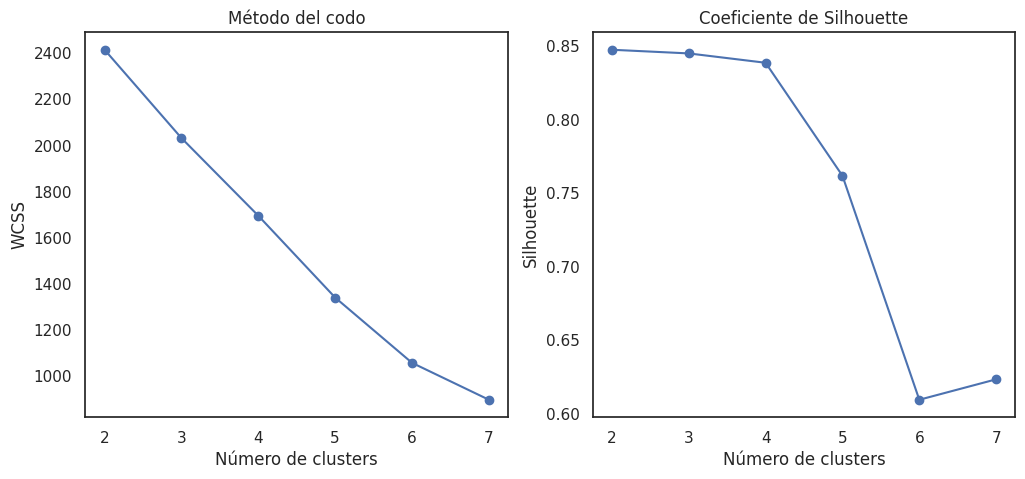

In [37]:
wcss = []
sil = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X_scaled, kmeans.labels_))

fig, ax = plt.subplots(1, 2, figsize=(12,5))
ax[0].plot(K, wcss, marker='o')
ax[0].set_title("Método del codo")
ax[0].set_xlabel("Número de clusters")
ax[0].set_ylabel("WCSS")

ax[1].plot(K, sil, marker='o')
ax[1].set_title("Coeficiente de Silhouette")
ax[1].set_xlabel("Número de clusters")
ax[1].set_ylabel("Silhouette")
plt.show()


In [38]:
best_k = 5
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_ratios["cluster"] = kmeans.fit_predict(X_scaled)

In [39]:
df_ratios_log = df_ratios.copy()

for col in ratios_cols:
  df_ratios_log[f"log_{col}"] = np.log1p(df_ratios[col])

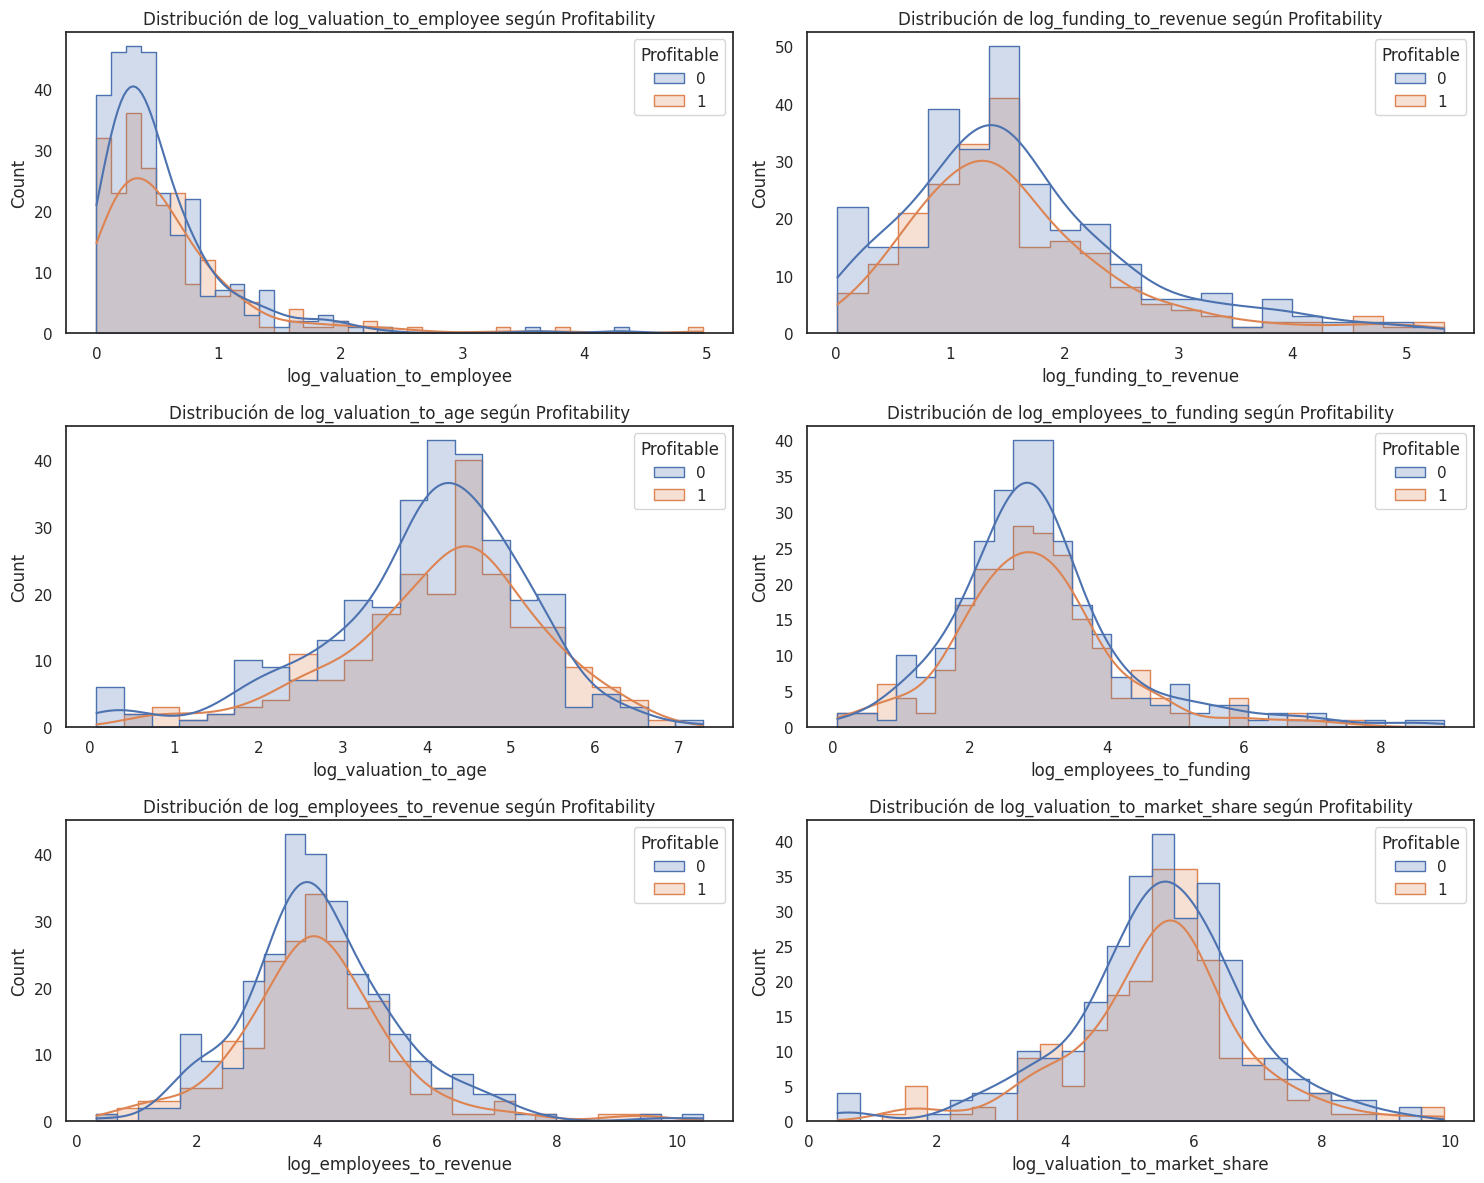

In [40]:

log_cols = [f"log_{col}" for col in ratios_cols]

plt.figure(figsize=(15, 12))

for i, col in enumerate(log_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df_ratios_log, x=col, hue="Profitable", kde=True, element="step")
    plt.title(f"Distribución de {col} según Profitability")

plt.tight_layout()
plt.show()

In [41]:
# Variables log-transformadas
log_cols = [f"log_{col}" for col in ratios_cols]

X = df_ratios_log[log_cols].replace([np.inf, -np.inf], np.nan).dropna()

# Estandarizar
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

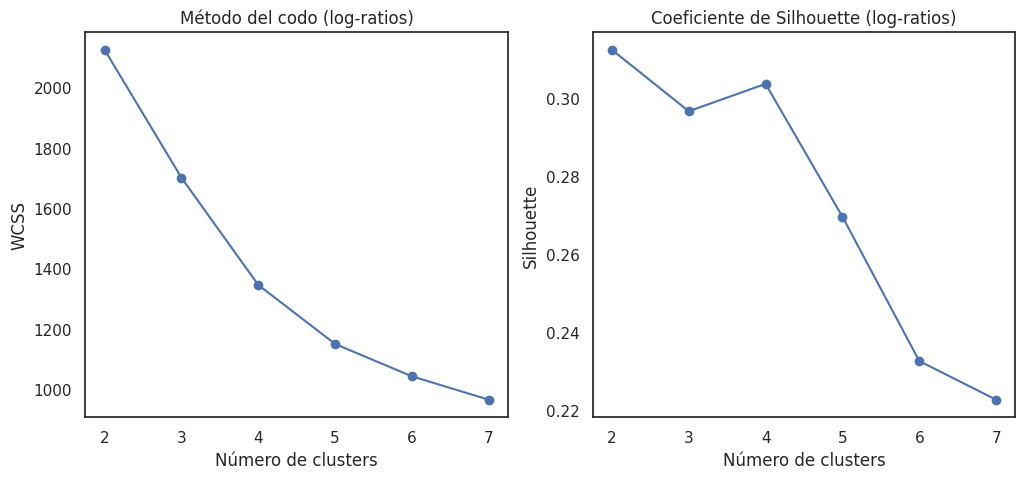

In [42]:
wcss = []
sil = []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X_scaled, kmeans.labels_))

fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Método del codo
ax[0].plot(K, wcss, marker='o')
ax[0].set_title("Método del codo (log-ratios)")
ax[0].set_xlabel("Número de clusters")
ax[0].set_ylabel("WCSS")

# Silhouette
ax[1].plot(K, sil, marker='o')
ax[1].set_title("Coeficiente de Silhouette (log-ratios)")
ax[1].set_xlabel("Número de clusters")
ax[1].set_ylabel("Silhouette")

plt.show()


In [43]:
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df_ratios_log["cluster"] = kmeans.fit_predict(X_scaled)


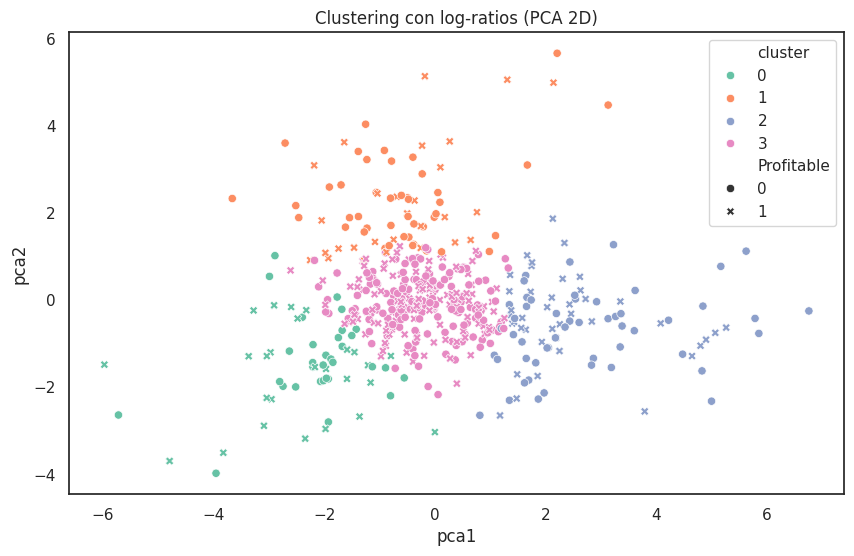

In [44]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_plot = df_ratios_log.loc[X.index].copy()
df_plot["pca1"] = X_pca[:,0]
df_plot["pca2"] = X_pca[:,1]

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_plot, x="pca1", y="pca2", hue="cluster", style="Profitable", palette="Set2")
plt.title("Clustering con log-ratios (PCA 2D)")
plt.show()

In [45]:
# Calcular silhouette por observación
silhouette_vals = silhouette_samples(X_scaled, df_ratios_log["cluster"])

df_ratios_log["silhouette"] = silhouette_vals

cluster_sil = (
    df_ratios_log.groupby("cluster")["silhouette"]
    .mean()
    .sort_values(ascending=False))

print("Silhouette promedio por cluster:")
print(cluster_sil)

Silhouette promedio por cluster:
cluster
3    0.368519
2    0.250018
0    0.213304
1    0.196470
Name: silhouette, dtype: float64


Siguen siendo silhouette bajos

# Clustering con categoricas

In [46]:
# Variables categóricas
cat_cols = ["Industry", "Region", "Exit Status"]

# One-Hot Encoding
df_encoded = pd.get_dummies(df_ratios_log[cat_cols], drop_first=True)

X_all = pd.concat([df_ratios_log[log_cols], df_encoded], axis=1)

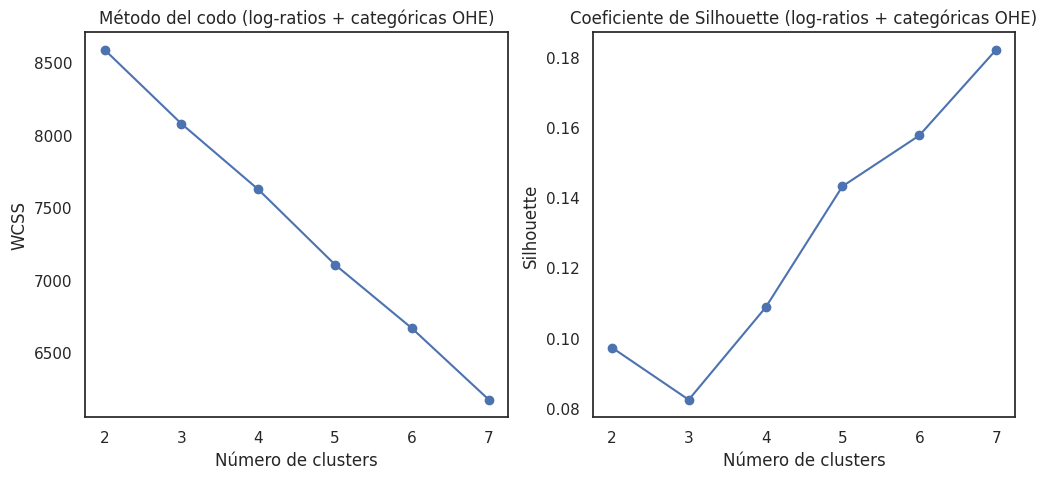

In [47]:
# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_all)

# Método del codo + Silhouette
wcss, sil = [], []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X_scaled, kmeans.labels_))

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(K, wcss, marker='o')
ax[0].set_title("Método del codo (log-ratios + categóricas OHE)")
ax[0].set_xlabel("Número de clusters")
ax[0].set_ylabel("WCSS")

ax[1].plot(K, sil, marker='o')
ax[1].set_title("Coeficiente de Silhouette (log-ratios + categóricas OHE)")
ax[1].set_xlabel("Número de clusters")
ax[1].set_ylabel("Silhouette")

plt.show()

In [48]:
pca = PCA(n_components=10, random_state=42)
X_reduced = pca.fit_transform(X_scaled)

print("Varianza explicada acumulada:", pca.explained_variance_ratio_.cumsum())

Varianza explicada acumulada: [0.15859859 0.25669268 0.33762044 0.40842168 0.47521862 0.54048433
 0.60239637 0.66327906 0.7224705  0.77861882]


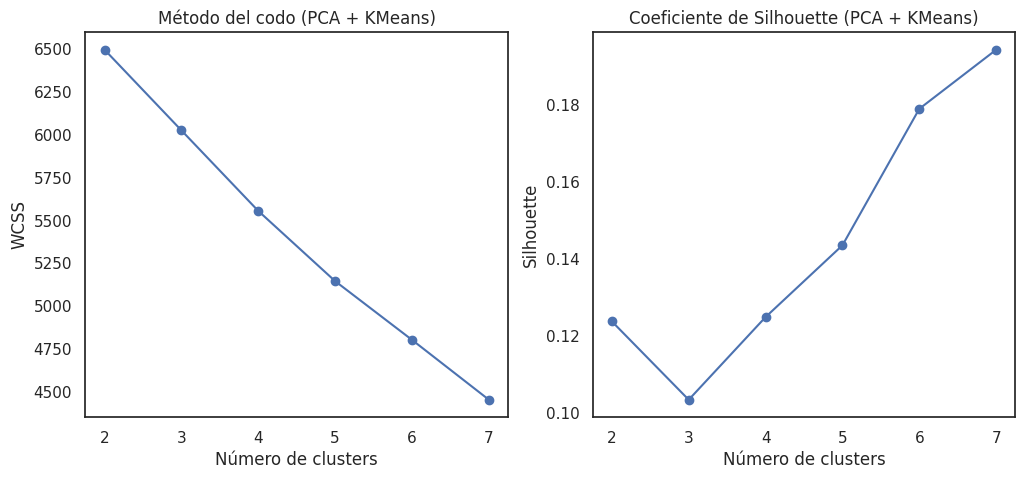

In [49]:
wcss, sil = [], []
K = range(2, 8)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_reduced)
    wcss.append(kmeans.inertia_)
    sil.append(silhouette_score(X_reduced, kmeans.labels_))

fig, ax = plt.subplots(1, 2, figsize=(12,5))

ax[0].plot(K, wcss, marker='o')
ax[0].set_title("Método del codo (PCA + KMeans)")
ax[0].set_xlabel("Número de clusters")
ax[0].set_ylabel("WCSS")

ax[1].plot(K, sil, marker='o')
ax[1].set_title("Coeficiente de Silhouette (PCA + KMeans)")
ax[1].set_xlabel("Número de clusters")
ax[1].set_ylabel("Silhouette")

plt.show()


# K-Modes

In [50]:
from kmodes.kmodes import KModes

In [51]:
# Selección de variables categóricas
cat_vars = ['Industry', 'Region', 'Exit Status', 'Profitable']

X_cat = df_ratios[cat_vars].copy()

# Codificar categorías a números
for col in X_cat.columns:
    X_cat[col] = X_cat[col].astype('category').cat.codes

# K-Modes clustering
km = KModes(n_clusters=4, init='Huang', n_init=10, random_state=42)
clusters = km.fit_predict(X_cat)

df_ratios['kmodes_cluster'] = clusters

In [52]:
from kmodes.kprototypes import KPrototypes

# Separar numéricas y categóricas
cat_cols = ['Industry', 'Region', 'Exit Status', 'Profitable']
num_cols = [c for c in df_ratios.columns if c not in cat_cols + ['Startup Name','cluster']]

X = df_ratios[cat_cols + num_cols].copy()

# Convertir categóricas
for col in cat_cols:
    X[col] = X[col].astype('category')

X_matrix = X.to_numpy()

kproto = KPrototypes(n_clusters=4, init='Cao', random_state=42)
clusters = kproto.fit_predict(X_matrix, categorical=[X.columns.get_loc(c) for c in cat_cols])

df_ratios['kproto_cluster'] = clusters


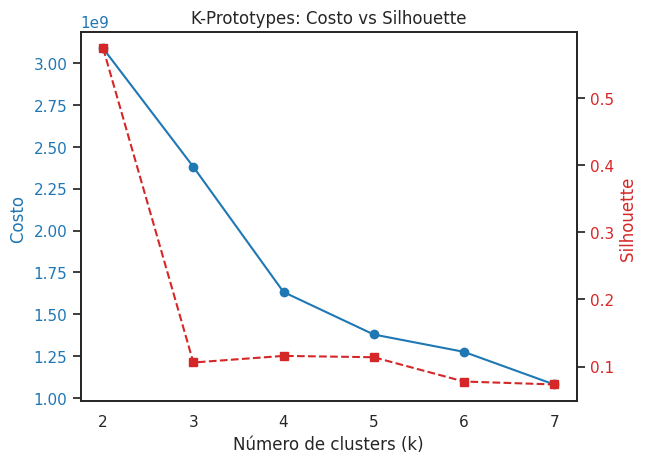

In [53]:
# Separar numéricas y categóricas
cat_cols = ['Industry', 'Region', 'Exit Status', 'Profitable']
num_cols = [c for c in df_ratios.columns if c not in cat_cols + ['Startup Name','cluster']]

X = df_ratios[cat_cols + num_cols].copy()

# Convertir categóricas a category
for col in cat_cols:
    X[col] = X[col].astype('category')

X_matrix = X.to_numpy()

# Probar distintos K
costs = []
silhouettes = []
K_range = range(2, 8)

for k in K_range:
    kproto = KPrototypes(n_clusters=k, init='Cao', random_state=42, n_init=5, verbose=0)
    clusters = kproto.fit_predict(X_matrix, categorical=[X.columns.get_loc(c) for c in cat_cols])

    costs.append(kproto.cost_)

    try:
        X_num_scaled = StandardScaler().fit_transform(df_ratios[num_cols])
        sil = silhouette_score(X_num_scaled, clusters)
    except:
        sil = np.nan
    silhouettes.append(sil)

#  Graficar el "método del codo" y silhouette

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('Número de clusters (k)')
ax1.set_ylabel('Costo ', color=color)
ax1.plot(K_range, costs, marker='o', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Silhouette ', color=color)
ax2.plot(K_range, silhouettes, marker='s', linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title("K-Prototypes: Costo vs Silhouette")
plt.show()

Distribución por cluster vs Profitable (%)
Profitable         0     1
kproto_cluster            
0               57.1  42.9
1               55.6  44.4
2               56.7  43.3
3               50.0  50.0

Distribución por cluster vs Exit Status (%)
Exit Status     Acquired   IPO  Private
kproto_cluster                         
0                   18.5   9.4     72.0
1                   22.2  11.1     66.7
2                   24.0   8.6     67.4
3                   50.0   0.0     50.0


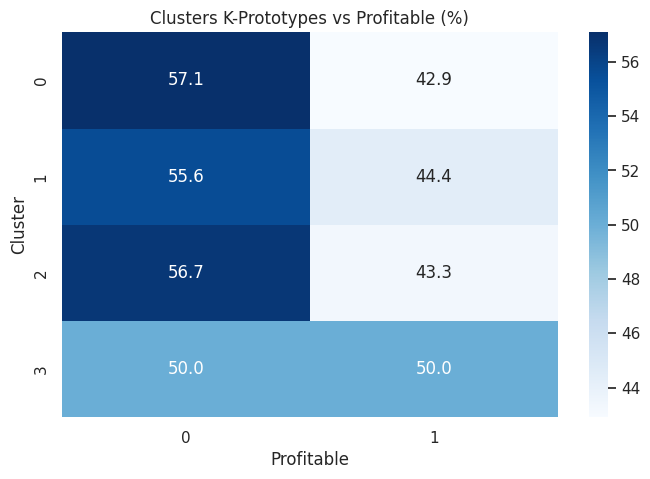

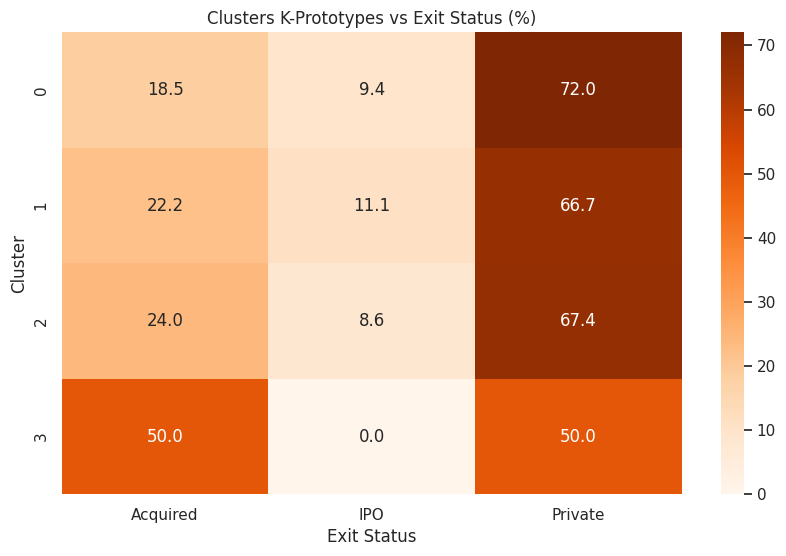

In [54]:
# Tablas de distribución
tab_profitable = pd.crosstab(df_ratios['kproto_cluster'], df_ratios['Profitable'], normalize='index') * 100
tab_exit = pd.crosstab(df_ratios['kproto_cluster'], df_ratios['Exit Status'], normalize='index') * 100

print("Distribución por cluster vs Profitable (%)")
print(tab_profitable.round(1))
print("\nDistribución por cluster vs Exit Status (%)")
print(tab_exit.round(1))

# Heatmap para rentabilidad
plt.figure(figsize=(8,5))
sns.heatmap(tab_profitable, annot=True, fmt=".1f", cmap="Blues")
plt.title("Clusters K-Prototypes vs Profitable (%)")
plt.ylabel("Cluster")
plt.xlabel("Profitable")
plt.show()

plt.figure(figsize=(10,6))
sns.heatmap(tab_exit, annot=True, fmt=".1f", cmap="Oranges")
plt.title("Clusters K-Prototypes vs Exit Status (%)")
plt.ylabel("Cluster")
plt.xlabel("Exit Status")
plt.show()


# DBScan

In [55]:
# Variables numéricas y categoricas
num_cols = ['Funding Rounds','Funding Amount (M USD)','Valuation (M USD)',
            'Revenue (M USD)','Employees','Market Share (%)',
            'age','valuation_to_employee','funding_to_revenue',
            'valuation_to_age','employees_to_funding',
            'employees_to_revenue','valuation_to_market_share']

X_num = df_ratios[num_cols].fillna(0)
X_scaled = StandardScaler().fit_transform(X_num)

# Explorar diferentes eps
eps_values = [0.5, 1, 1.5, 2]
min_samples = 5

for eps in eps_values:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        sil = silhouette_score(X_scaled, labels)
    else:
        sil = np.nan

    print(f"eps={eps} → clusters={n_clusters}, ruido={n_noise}, silhouette={sil:.3f}")


eps=0.5 → clusters=0, ruido=500, silhouette=nan
eps=1 → clusters=1, ruido=494, silhouette=nan
eps=1.5 → clusters=5, ruido=211, silhouette=-0.163
eps=2 → clusters=2, ruido=60, silhouette=0.227


In [56]:
#Normalizando
X_scaled = StandardScaler().fit_transform(df_ratios[num_cols].fillna(0))

eps_range = np.arange(0.5, 3.1, 0.2)
min_samples_range = range(3, 11)

results = []

for eps in eps_range:
    for ms in min_samples_range:
        db = DBSCAN(eps=eps, min_samples=ms).fit(X_scaled)
        labels = db.labels_
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)

        if n_clusters > 1:
            sil = silhouette_score(X_scaled, labels)
        else:
            sil = np.nan

        results.append({
            "eps": eps,
            "min_samples": ms,
            "clusters": n_clusters,
            "ruido": n_noise,
            "silhouette": sil
        })

# Convertir a DataFrame ordenado
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="silhouette", ascending=False)
print(df_results.head(10))


    eps  min_samples  clusters  ruido  silhouette
64  2.1            3         2     46    0.229543
66  2.1            5         2     51    0.229173
65  2.1            4         2     49    0.228141
56  1.9            3         2     65    0.224563
57  1.9            4         2     69    0.223334
58  1.9            5         2     72    0.221682
48  1.7            3         2     92    0.211238
49  1.7            4         2    101    0.204782
40  1.5            3         3    151   -0.067845
43  1.5            6         2    244   -0.074268


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Clusters encontrados: 2
Puntos de ruido: 0
Silhouette en espacio UMAP: 0.194


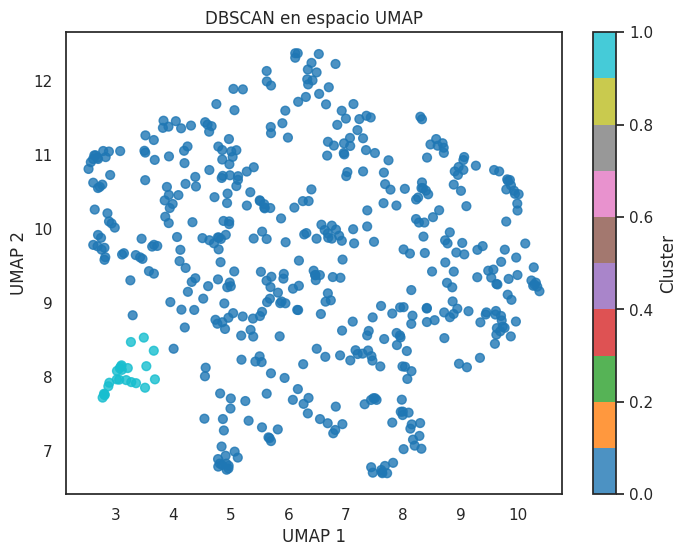

In [57]:
# Variables numéricas
X_num = df_ratios[num_cols].fillna(0)
X_scaled = StandardScaler().fit_transform(X_num)

# Reducir con UMAP a 2D
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

# Aplicar DBSCAN sobre UMAP

db = DBSCAN(eps=0.5, min_samples=5).fit(X_umap)
labels = db.labels_

# Guardar clusters en el df
df_ratios['dbscan_umap'] = labels

# Evaluar calidad

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
if n_clusters > 1:
    sil = silhouette_score(X_umap, labels)
else:
    sil = np.nan

print(f"Clusters encontrados: {n_clusters}")
print(f"Puntos de ruido: {n_noise}")
print(f"Silhouette en espacio UMAP: {sil:.3f}")


# 5) Graicar clusters

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap[:,0], X_umap[:,1], c=labels, cmap='tab10', s=40, alpha=0.8)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("DBSCAN en espacio UMAP")
plt.colorbar(scatter, label="Cluster")
plt.show()


# Dendograma

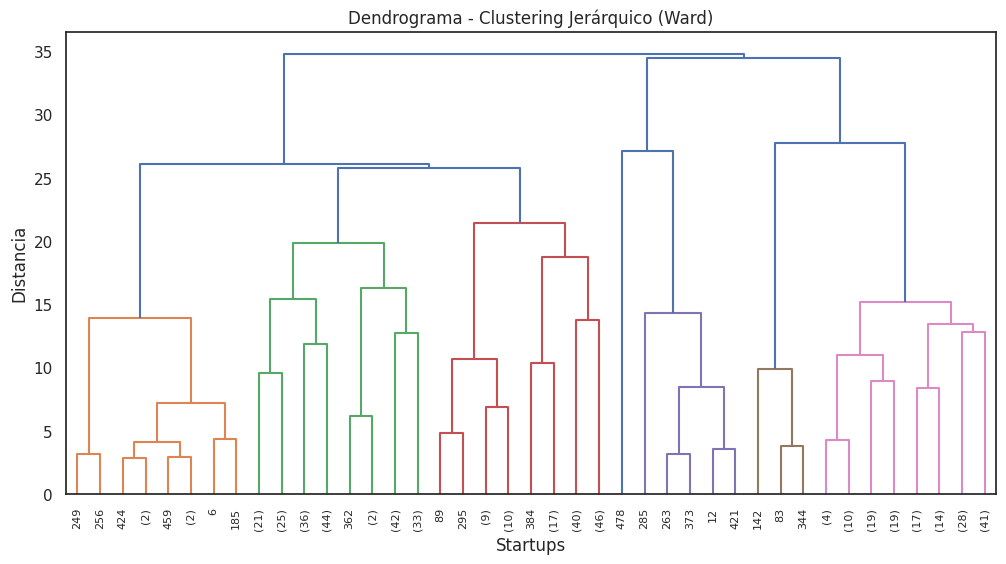

In [58]:
# Variables
num_cols = ['Funding Rounds','Funding Amount (M USD)','Valuation (M USD)',
            'Revenue (M USD)','Employees','Market Share (%)',
            'age','valuation_to_employee','funding_to_revenue',
            'valuation_to_age','employees_to_funding',
            'employees_to_revenue','valuation_to_market_share']

X_num = df_ratios[num_cols].fillna(0)
X_scaled = StandardScaler().fit_transform(X_num)


# Dendograma
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(12,6))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Dendrograma - Clustering Jerárquico (Ward)")
plt.xlabel("Startups")
plt.ylabel("Distancia")
plt.show()


# Graficar clusters (p=4)
clusters = fcluster(linked, t=4, criterion='maxclust')
df_ratios['hier_cluster'] = clusters


#KPrototypes

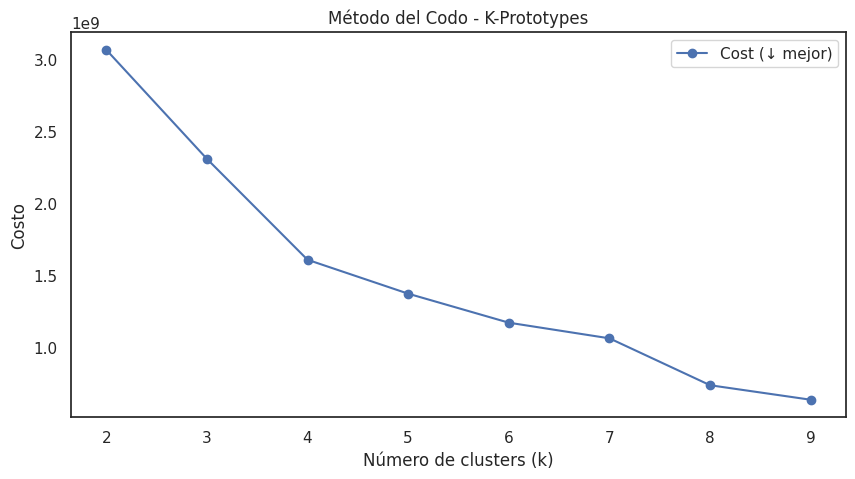

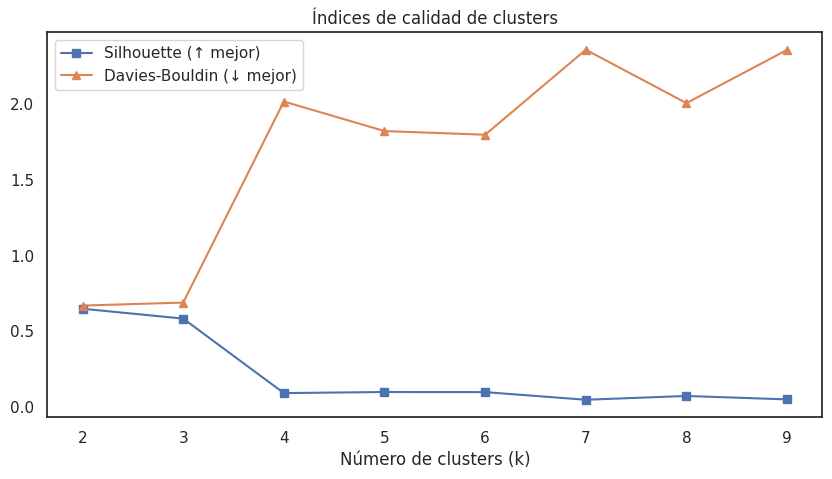

In [59]:
X = df_ratios[cat_cols + num_cols].copy()

# Convertir categóricas
for col in cat_cols:
    X[col] = X[col].astype('category')
X_matrix = X.to_numpy()

costs, silhouettes, dbis = [], [], []
k_range = range(2, 10)

for k in k_range:
    model = KPrototypes(n_clusters=k, init='Cao', random_state=42, n_init=5)
    clusters = model.fit_predict(X_matrix, categorical=[X.columns.get_loc(c) for c in cat_cols])

    costs.append(model.cost_)

    try:
        sil = silhouette_score(StandardScaler().fit_transform(df_ratios[num_cols]), clusters)
    except:
        sil = np.nan
    silhouettes.append(sil)

    try:
        dbi = davies_bouldin_score(StandardScaler().fit_transform(df_ratios[num_cols]), clusters)
    except:
        dbi = np.nan
    dbis.append(dbi)

# Graficar Elbow (Cost) y Silhouette
plt.figure(figsize=(10,5))
plt.plot(k_range, costs, marker='o', label="Cost (↓ mejor)")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Costo")
plt.title("Método del Codo - K-Prototypes")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
plt.plot(k_range, silhouettes, marker='s', label="Silhouette (↑ mejor)")
plt.plot(k_range, dbis, marker='^', label="Davies-Bouldin (↓ mejor)")
plt.xlabel("Número de clusters (k)")
plt.title("Índices de calidad de clusters")
plt.legend()
plt.show()


## Busquedad de hiperparametros para K-Prototypes

In [60]:
# Variables
cat_cols = ['Industry', 'Region', 'Exit Status', 'Profitable']
num_cols = [c for c in df_ratios.columns if c not in cat_cols + ['Startup Name','cluster']]

X = df_ratios[cat_cols + num_cols].copy()
for col in cat_cols:
    X[col] = X[col].astype('category')

X_matrix = X.to_numpy()
X_num_scaled = StandardScaler().fit_transform(df_ratios[num_cols].fillna(0))

# Grid Search

results = []
grid = {
    "init": ["Cao","Huang"],
    "gamma": [None, 0.5, 1.0, 2.0],
    "n_init": [5, 10]
}

for init, gamma, n_init in itertools.product(grid["init"], grid["gamma"], grid["n_init"]):
    model = KPrototypes(n_clusters=3, init=init, random_state=42, n_init=n_init, gamma=gamma)
    clusters = model.fit_predict(X_matrix, categorical=[X.columns.get_loc(c) for c in cat_cols])

    cost = model.cost_
    try:
        sil = silhouette_score(X_num_scaled, clusters)
    except:
        sil = None
    try:
        ch = calinski_harabasz_score(X_num_scaled, clusters)
    except:
        ch = None
    try:
        dbi = davies_bouldin_score(X_num_scaled, clusters)
    except:
        dbi = None

    results.append({
        "init": init,
        "gamma": gamma,
        "n_init": n_init,
        "cost": cost,
        "silhouette": sil,
        "calinski_harabasz": ch,
        "davies_bouldin": dbi
    })

df_results = pd.DataFrame(results).sort_values(by="silhouette", ascending=False)
print(df_results.head(10))


     init  gamma  n_init          cost  silhouette  calinski_harabasz  \
1     Cao    NaN      10  2.326778e+09    0.397307          28.388698   
3     Cao    0.5      10  2.326611e+09    0.397307          28.388698   
7     Cao    2.0      10  2.326613e+09    0.397307          28.388698   
5     Cao    1.0      10  2.326612e+09    0.397307          28.388698   
13  Huang    1.0      10  2.326612e+09    0.397307          28.388698   
15  Huang    2.0      10  2.326613e+09    0.397307          28.388698   
11  Huang    0.5      10  2.326611e+09    0.397307          28.388698   
9   Huang    NaN      10  2.326778e+09    0.397307          28.388698   
6     Cao    2.0       5  2.381105e+09    0.099006          37.522884   
4     Cao    1.0       5  2.381104e+09    0.099006          37.522884   

    davies_bouldin  
1         1.104301  
3         1.104301  
7         1.104301  
5         1.104301  
13        1.104301  
15        1.104301  
11        1.104301  
9         1.104301  
6      

## Modelo final K-Prototypes con los mejores hiperparametros

In [61]:
df_hybrid = df_ratios.copy()

crudas_log = [
    "Funding Amount (M USD)", "Revenue (M USD)",
    "Valuation (M USD)", "Employees"
]

for col in crudas_log:
    df_hybrid[col + "_log"] = np.log1p(df_hybrid[col])  # log(1+x)

# Variables finales

num_hybrid = [
    "Funding Amount (M USD)_log", "Revenue (M USD)_log", "Valuation (M USD)_log", "Employees_log",
    "Market Share (%)", "age",
    "funding_to_revenue", "employees_to_revenue", "valuation_to_age", "valuation_to_market_share"
]

cat_dep = ["Industry", "Region", "Exit Status"]

X_hybrid = df_hybrid[cat_dep + num_hybrid].copy()
for col in cat_dep:
    X_hybrid[col] = X_hybrid[col].astype("category")

X_matrix_hybrid = X_hybrid.to_numpy()

[WARN] k=8 saltado: no se pudo inicializar.
[WARN] k=9 saltado: no se pudo inicializar.


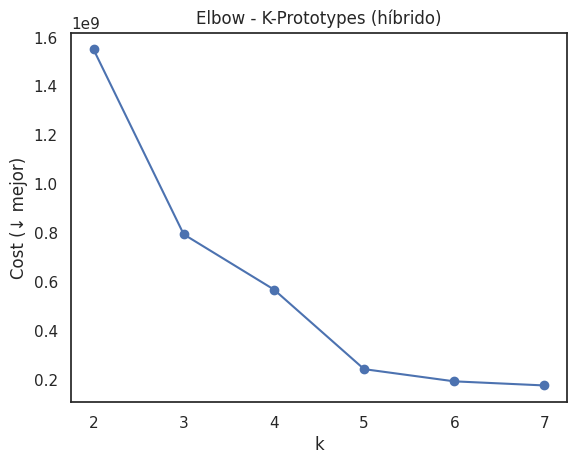

In [62]:
# Variales limpias
cols_use = cat_dep + num_hybrid
X_hybrid = df_hybrid[cols_use].copy()

# Categóricas: tipo category; Numéricas: float
for c in cat_dep:
    X_hybrid[c] = X_hybrid[c].astype('category')
X_hybrid[num_hybrid] = X_hybrid[num_hybrid].astype(float)

# Drop rows con NaN en columnas usadas
X_hybrid = X_hybrid.dropna(subset=cols_use).copy()

X_matrix_hybrid = X_hybrid.to_numpy()
cat_idx = [X_hybrid.columns.get_loc(c) for c in cat_dep]

def fit_kproto_safe(k, gamma=2.0, n_init=5, random_state=42):
    # 1) intenta Huang
    try:
        m = KPrototypes(n_clusters=k, init='Huang', n_init=n_init,
                        random_state=random_state, gamma=gamma)
        m.fit_predict(X_matrix_hybrid, categorical=cat_idx)
        return m
    except Exception:
        # 2) intenta Cao
        try:
            m = KPrototypes(n_clusters=k, init='Cao', n_init=n_init,
                            random_state=random_state, gamma=gamma)
            m.fit_predict(X_matrix_hybrid, categorical=cat_idx)
            return m
        except Exception:
            return None

# Método del codo
costs, ks_ok = [], []
for k in range(2, 10):
    model = fit_kproto_safe(k, gamma=2.0, n_init=10, random_state=42)
    if model is not None:
        costs.append(model.cost_)
        ks_ok.append(k)
    else:
        print(f"[WARN] k={k} saltado: no se pudo inicializar.")

import matplotlib.pyplot as plt
plt.plot(ks_ok, costs, marker='o')
plt.xlabel("k")
plt.ylabel("Cost (↓ mejor)")
plt.title("Elbow - K-Prototypes (híbrido)")
plt.show()

In [63]:
X_num_scaled_hybrid = StandardScaler().fit_transform(X_hybrid[num_hybrid])

def eval_model(init, gamma, n_init, seed=42):
    # intenta Huang luego Cao
    for init_try in ([init] if init in ['Huang','Cao'] else ['Huang','Cao']):
        try:
            m = KPrototypes(n_clusters=3, init=init_try, n_init=n_init,
                            random_state=seed, gamma=gamma)
            cl = m.fit_predict(X_matrix_hybrid, categorical=cat_idx)
            return {
                "init": init_try, "gamma": gamma, "n_init": n_init,
                "cost": m.cost_,
                "silhouette": silhouette_score(X_num_scaled_hybrid, cl),
                "calinski_harabasz": calinski_harabasz_score(X_num_scaled_hybrid, cl),
                "davies_bouldin": davies_bouldin_score(X_num_scaled_hybrid, cl)
            }
        except Exception:
            continue
    return None

#Grid Search
grid_inits = ["Huang","Cao"]
grid_gammas = [0.5, 1.0, 2.0, 3.0]
grid_ninits = [5, 10]

grid_results = []
for init in grid_inits:
    for gamma in grid_gammas:
        for n_init in grid_ninits:
            res = eval_model(init, gamma, n_init, seed=42)
            if res: grid_results.append(res)

df_grid = pd.DataFrame(grid_results).sort_values("silhouette", ascending=False)
print("Top Grid Search:\n", df_grid.head(10))

# Random Search (gamma continuo)
import random
rand_results = []
for _ in range(20):
    init = random.choice(["Huang","Cao"])
    gamma = round(random.uniform(0.2, 4.0), 2)
    n_init = random.choice([5, 10])
    res = eval_model(init, gamma, n_init, seed=random.randint(1, 10_000))
    if res: rand_results.append(res)

df_rand = pd.DataFrame(rand_results).sort_values("silhouette", ascending=False)
print("Top Random Search:\n", df_rand.head(10))


Top Grid Search:
     init  gamma  n_init          cost  silhouette  calinski_harabasz  \
0  Huang    0.5       5  7.940419e+08    0.505724          56.937831   
1  Huang    0.5      10  7.940419e+08    0.505724          56.937831   
2  Huang    1.0       5  7.940424e+08    0.505724          56.937831   
3  Huang    1.0      10  7.940424e+08    0.505724          56.937831   
4  Huang    2.0       5  7.940434e+08    0.505724          56.937831   
5  Huang    2.0      10  7.940434e+08    0.505724          56.937831   
6  Huang    3.0       5  7.940444e+08    0.505724          56.937831   
7  Huang    3.0      10  7.940444e+08    0.505724          56.937831   
8    Cao    0.5       5  7.940419e+08    0.505724          56.937831   
9    Cao    0.5      10  7.940419e+08    0.505724          56.937831   

   davies_bouldin  
0        0.819942  
1        0.819942  
2        0.819942  
3        0.819942  
4        0.819942  
5        0.819942  
6        0.819942  
7        0.819942  
8        

Métricas finales (γ≈3, k=3)
Silhouette: 0.506, Calinski-Harabasz: 56.94, Davies-Bouldin: 0.820, Cost: 7.94e+08

Perfil de clusters finales:
               Funding Amount (M USD)_log  Revenue (M USD)_log  \
cluster_final                                                    
0                                    5.05                 3.93   
1                                    5.45                 3.68   
2                                    3.26                 0.26   

               Valuation (M USD)_log  Employees_log  Market Share (%)   age  \
cluster_final                                                                 
0                                7.1           7.82              5.18  19.0   
1                                7.7           7.77              0.23  22.0   
2                                5.2           8.41              5.96  14.5   

               funding_to_revenue  employees_to_revenue  valuation_to_age  \
cluster_final                                           

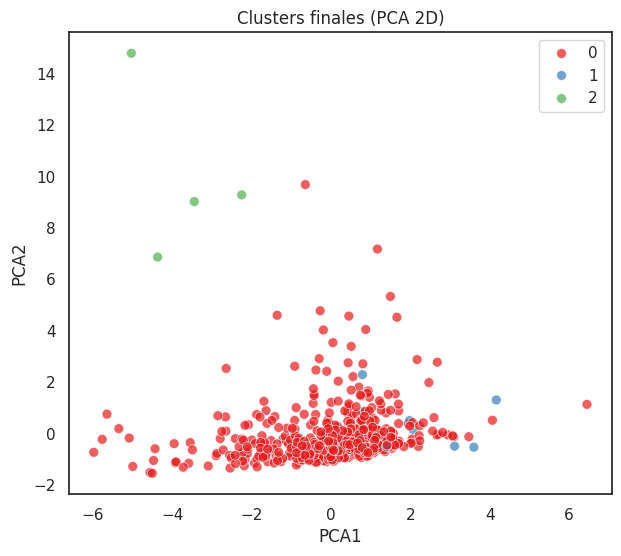

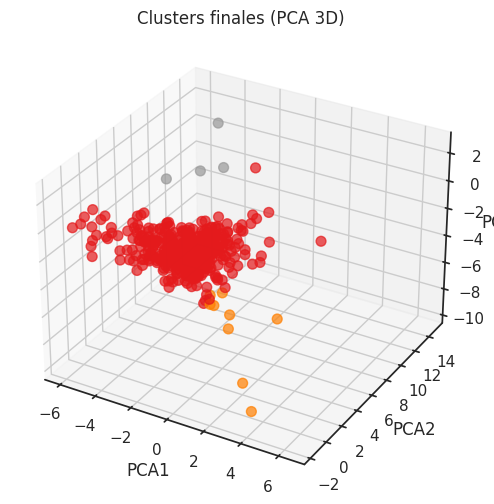

In [65]:
# Entrenar modelo final
model_final = KPrototypes(n_clusters=3, init="Huang", random_state=42, n_init=10, gamma=3.0)
clusters_final = model_final.fit_predict(X_matrix_hybrid, categorical=[X_hybrid.columns.get_loc(c) for c in cat_dep])

df_hybrid["cluster_final"] = clusters_final

# Métricas
sil = silhouette_score(X_num_scaled_hybrid, clusters_final)
ch = calinski_harabasz_score(X_num_scaled_hybrid, clusters_final)
dbi = davies_bouldin_score(X_num_scaled_hybrid, clusters_final)
cost = model_final.cost_

print("Métricas finales (γ≈3, k=3)")
print(f"Silhouette: {sil:.3f}, Calinski-Harabasz: {ch:.2f}, Davies-Bouldin: {dbi:.3f}, Cost: {cost:.2e}")

# Perfil de clusters
profile_final = df_hybrid.groupby("cluster_final")[num_hybrid].median().round(2)
print("\nPerfil de clusters finales:")
print(profile_final)

# Distribución por variables clave
print("\nDistribución Profitable por cluster:")
print(df_hybrid.groupby("cluster_final")["Profitable"].value_counts(normalize=True).unstack().round(2))

print("\nDistribución Exit Status por cluster:")
print(df_hybrid.groupby("cluster_final")["Exit Status"].value_counts(normalize=True).unstack().round(2))

# PCA 2D
pca_2d = PCA(n_components=2).fit_transform(X_num_scaled_hybrid)
df_plot2d = pd.DataFrame({"PCA1": pca_2d[:,0], "PCA2": pca_2d[:,1], "Cluster": clusters_final})

plt.figure(figsize=(7,6))
sns.scatterplot(data=df_plot2d, x="PCA1", y="PCA2", hue="Cluster", palette="Set1", s=50, alpha=0.7)
plt.title("Clusters finales (PCA 2D)")
plt.legend()
plt.show()

# PCA 3D
pca_3d = PCA(n_components=3).fit_transform(X_num_scaled_hybrid)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(pca_3d[:,0], pca_3d[:,1], pca_3d[:,2],
           c=clusters_final, cmap="Set1", s=50, alpha=0.7)
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("Clusters finales (PCA 3D)")
plt.show()


# Con k=5

[K-Prototypes] k=5 | costo=515235834.122 | iters=3
Métricas k=5 → Silhouette=0.141 | Calinski-Harabasz=39.5 | Davies-Bouldin=1.569

Tamaños de cluster:
 cluster
0    442
1      4
2     41
3      4
4      9
Name: n, dtype: int64

Moda categóricas por cluster:
            Industry         Region Exit Status
cluster                                       
0            EdTech      Australia     Private
1           FinTech      Australia     Private
2        E-Commerce  North America     Private
3                AI      Australia    Acquired
4               IoT         Europe     Private

Top-3 categorías por cluster:
                                      Industry  \
cluster                                         
0        EdTech:69; E-Commerce:62; FinTech:61   
1        FinTech:2; Gaming:1; Cybersecurity:1   
2           Gaming:8; E-Commerce:8; FinTech:7   
3                                 IoT:2; AI:2   
4                       IoT:3; EdTech:2; AI:2   

                                   

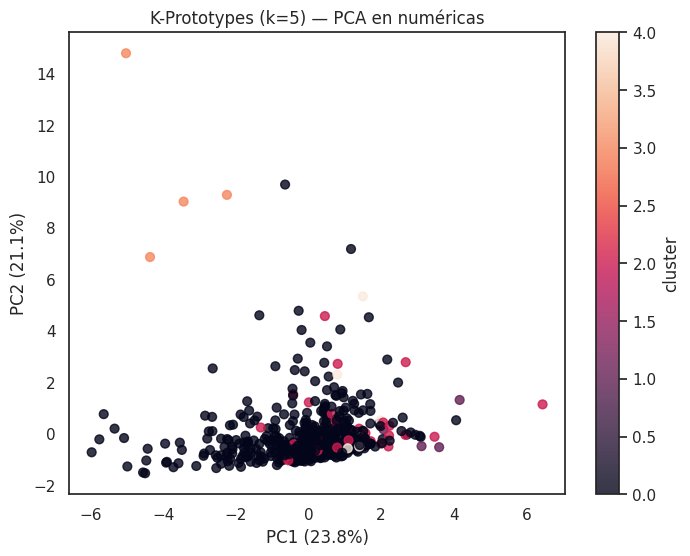

In [68]:
# Datos base
df_hybrid = df_ratios.copy()

crudas_log = [
    "Funding Amount (M USD)", "Revenue (M USD)",
    "Valuation (M USD)", "Employees"
]
for col in crudas_log:
    df_hybrid[col + "_log"] = np.log1p(df_hybrid[col])  # log(1+x)

num_hybrid = [
    "Funding Amount (M USD)_log", "Revenue (M USD)_log", "Valuation (M USD)_log", "Employees_log",
    "Market Share (%)", "age",
    "funding_to_revenue", "employees_to_revenue", "valuation_to_age", "valuation_to_market_share"
]
cat_dep = ["Industry", "Region", "Exit Status"]

X_hybrid = df_hybrid[cat_dep + num_hybrid].copy()
for col in cat_dep:
    X_hybrid[col] = X_hybrid[col].astype("category")

# kmodes/kprototypes acepta matriz mixta (object) con strings en categóricas:
X_matrix_hybrid = X_hybrid.to_numpy()

# índices de columnas categóricas (van primero)
cat_idx = list(range(len(cat_dep)))

# K-Prototypes (k=5)
k = 5
kproto = KPrototypes(
    n_clusters=k,
    init='Cao',
    n_init=10,
    max_iter=100,
    random_state=42,
    verbose=0
)
clusters = kproto.fit_predict(X_matrix_hybrid, categorical=cat_idx)

# Adjuntar clusters
df_out = df_hybrid.copy()
df_out['cluster'] = clusters

print(f"[K-Prototypes] k={k} | costo={kproto.cost_:.3f} | iters={kproto.n_iter_}")

# Métricas (sobre numéricas estandarizadas)

scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_hybrid[num_hybrid])

sil = silhouette_score(X_num_scaled, clusters)
ch = calinski_harabasz_score(X_num_scaled, clusters)
db = davies_bouldin_score(X_num_scaled, clusters)
print(f"Métricas k={k} → Silhouette={sil:.3f} | Calinski-Harabasz={ch:.1f} | Davies-Bouldin={db:.3f}")

# Resumen
num_summary = (
    df_out.groupby('cluster')[num_hybrid]
    .agg(['mean','median','std'])
    .round(3)
)

size_summary = df_out['cluster'].value_counts().sort_index().rename('n')

# Categóricas: moda y top-3 frecuencias
def top3_counts(s):
    vc = s.value_counts(dropna=False)
    return '; '.join([f"{idx}:{cnt}" for idx, cnt in vc.head(3).items()])

cat_mode = df_out.groupby('cluster')[cat_dep].agg(lambda x: x.mode(dropna=False).iloc[0] if not x.mode(dropna=False).empty else np.nan)
cat_top3 = df_out.groupby('cluster')[cat_dep].agg(top3_counts)

print("\nTamaños de cluster:\n", size_summary)
print("\nModa categóricas por cluster:\n", cat_mode)
print("\nTop-3 categorías por cluster:\n", cat_top3)
print("\nResumen numéricas (mean/median/std):\n", num_summary)

# Visualización 2D (PCA sobre numéricas)

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_num_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters, s=40, alpha=0.8)
plt.title("K-Prototypes (k=5) — PCA en numéricas")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.colorbar(label="cluster")
plt.show()

In [71]:
def run_kproto_compare(df_hybrid, cat_dep, num_hybrid, ks=(3,5), gamma=0.5, init="Cao"):
    df = df_hybrid.copy()

    # Escalar numéricas
    scaler = StandardScaler()
    X_num_scaled = scaler.fit_transform(df[num_hybrid])

    # Matriz híbrida
    X_cat = df[cat_dep].astype(str).to_numpy()
    X = np.hstack([X_cat, X_num_scaled])
    cat_idx = list(range(len(cat_dep)))

    results = {}
    for k in ks:
        kproto = KPrototypes(
            n_clusters=k,
            init=init,
            gamma=gamma,
            n_init=10,
            max_iter=100,
            random_state=42,
            verbose=0
        )
        labels = kproto.fit_predict(X, categorical=cat_idx)
        df[f"cluster_{k}"] = labels

        sil = silhouette_score(X_num_scaled, labels)
        ch = calinski_harabasz_score(X_num_scaled, labels)
        db = davies_bouldin_score(X_num_scaled, labels)

        sizes = pd.Series(labels).value_counts().sort_index()
        topcats = df.groupby(f"cluster_{k}")[cat_dep].agg(lambda x: x.value_counts().index[0])

        results[k] = {
            "silhouette": sil,
            "calinski": ch,
            "davies_bouldin": db,
            "sizes": sizes.to_dict(),
            "topcats": topcats
        }

    return results, df

# === Ejecutar comparación ===
results, df_compare = run_kproto_compare(
    df_hybrid=df_hybrid,
    cat_dep=["Industry","Region","Exit Status"],
    num_hybrid=[
        "Funding Amount (M USD)_log","Revenue (M USD)_log","Valuation (M USD)_log","Employees_log",
        "Market Share (%)","age",
        "funding_to_revenue","employees_to_revenue","valuation_to_age","valuation_to_market_share"
    ],
    ks=(3,5),
    gamma=0.5,
    init="Cao"
)

# Mostrar resultados resumidos
for k, r in results.items():
    print(f"\n=== k={k} ===")
    print(f"Silhouette={r['silhouette']:.3f} | Calinski={r['calinski']:.1f} | Davies-Bouldin={r['davies_bouldin']:.3f}")
    print("Tamaños:", r['sizes'])
    print("Categorías dominantes:\n", r['topcats'])



=== k=3 ===
Silhouette=0.235 | Calinski=95.0 | Davies-Bouldin=1.426
Tamaños: {0: 370, 1: 115, 2: 15}
Categorías dominantes:
           Industry     Region Exit Status
cluster_3                                
0           EdTech  Australia     Private
1               AI  Australia     Private
2              IoT       Asia    Acquired

=== k=5 ===
Silhouette=0.176 | Calinski=86.3 | Davies-Bouldin=1.517
Tamaños: {0: 78, 1: 15, 2: 100, 3: 203, 4: 104}
Categorías dominantes:
              Industry     Region Exit Status
cluster_5                                   
0             FinTech  Australia     Private
1                 IoT       Asia    Acquired
2                  AI  Australia     Private
3              EdTech     Europe     Private
4          E-Commerce       Asia     Private


## Con esos hiperparametros - probamos distintas combinaciones de variables (Log - sin Log - ratio y log(ratio)

In [73]:
# Variables seleccionadas
num_selected = [
    "Funding Amount (M USD)",
    "Revenue (M USD)",
    "Valuation (M USD)",
    "Employees",
    "age",
    "Market Share (%)",
    "funding_to_revenue",
    "employees_to_revenue",
    "valuation_to_age"
]

cat_selected = ["Industry", "Region", "Exit Status"]


X_sel = df_ratios[cat_selected + num_selected].copy()
for col in cat_selected:
    X_sel[col] = X_sel[col].astype("category")
X_matrix_sel = X_sel.to_numpy()

model_sel = KPrototypes(n_clusters=3, init="Huang", random_state=42, n_init=10, gamma=2.0)
clusters_sel = model_sel.fit_predict(X_matrix_sel, categorical=[X_sel.columns.get_loc(c) for c in cat_selected])
df_ratios["kproto3_selected"] = clusters_sel

X_num_scaled_sel = StandardScaler().fit_transform(df_ratios[num_selected].fillna(0))
sil = silhouette_score(X_num_scaled_sel, clusters_sel)
ch = calinski_harabasz_score(X_num_scaled_sel, clusters_sel)
dbi = davies_bouldin_score(X_num_scaled_sel, clusters_sel)
cost = model_sel.cost_

print("Métricas con selección de features:")
print(f"Silhouette: {sil:.3f}, Calinski-Harabasz: {ch:.2f}, Davies-Bouldin: {dbi:.3f}, Cost: {cost:.2e}")

profile_sel = df_ratios.groupby("kproto3_selected")[num_selected].median().round(1)
print("\nPerfil clusters (variables seleccionadas):")
print(profile_sel)

Métricas con selección de features:
Silhouette: 0.109, Calinski-Harabasz: 61.38, Davies-Bouldin: 2.118, Cost: 1.12e+09

Perfil clusters (variables seleccionadas):
                  Funding Amount (M USD)  Revenue (M USD)  Valuation (M USD)  \
kproto3_selected                                                               
0                                  156.6             49.8             1274.1   
1                                   26.3              0.3              185.7   
2                                  156.6             48.9             1215.9   

                  Employees   age  Market Share (%)  funding_to_revenue  \
kproto3_selected                                                          
0                    1462.0  19.0               4.9                 3.2   
1                    4510.0  14.5               6.0               134.2   
2                    3735.0  19.0               5.2                 3.0   

                  employees_to_revenue  valuation_to_age  
k

In [74]:
num_dep = [
    "Funding Amount (M USD)", "Revenue (M USD)", "Employees", "Market Share (%)", "age",
    "funding_to_revenue", "employees_to_revenue", "valuation_to_age", "valuation_to_market_share"
]
cat_dep = ["Industry", "Region", "Exit Status"]


X_dep = df_ratios[cat_dep + num_dep].copy()
for col in cat_dep:
    X_dep[col] = X_dep[col].astype("category")

X_matrix_dep = X_dep.to_numpy()

model_dep = KPrototypes(n_clusters=3, init="Huang", random_state=42, n_init=10, gamma=2.0)
clusters_dep = model_dep.fit_predict(X_matrix_dep, categorical=[X_dep.columns.get_loc(c) for c in cat_dep])
df_ratios["kproto3_dep"] = clusters_dep

X_num_scaled_dep = StandardScaler().fit_transform(df_ratios[num_dep].fillna(0))
sil = silhouette_score(X_num_scaled_dep, clusters_dep)
ch = calinski_harabasz_score(X_num_scaled_dep, clusters_dep)
dbi = davies_bouldin_score(X_num_scaled_dep, clusters_dep)
cost = model_dep.cost_

print("Métricas con set depurado:")
print(f"Silhouette: {sil:.3f}, Calinski-Harabasz: {ch:.2f}, Davies-Bouldin: {dbi:.3f}, Cost: {cost:.2e}")


profile_dep = df_ratios.groupby("kproto3_dep")[num_dep].median().round(1)
print("\nPerfil clusters (set depurado):")
print(profile_dep)

Métricas con set depurado:
Silhouette: 0.517, Calinski-Harabasz: 60.76, Davies-Bouldin: 0.828, Cost: 1.74e+09

Perfil clusters (set depurado):
             Funding Amount (M USD)  Revenue (M USD)  Employees  \
kproto3_dep                                                       
0                             232.3             38.6     2373.0   
1                             155.7             49.8     2495.0   
2                              26.3              0.3     4510.0   

             Market Share (%)   age  funding_to_revenue  employees_to_revenue  \
kproto3_dep                                                                     
0                         0.2  22.0                 6.0                  63.6   
1                         5.2  19.0                 3.1                  50.7   
2                         6.0  14.5               134.2               15414.2   

             valuation_to_age  valuation_to_market_share  
kproto3_dep                                             

In [75]:
df_log = df_ratios.copy()

log_vars = [
    "Funding Amount (M USD)", "Revenue (M USD)", "Valuation (M USD)", "Employees",
    "funding_to_revenue", "employees_to_revenue", "employees_to_funding", "valuation_to_market_share"
]

for col in log_vars:
    df_log[col + "_log"] = np.log1p(df_log[col])


num_dep_log = [
    "Funding Amount (M USD)_log", "Revenue (M USD)_log", "Employees_log",
    "Market Share (%)", "age",
    "funding_to_revenue_log", "employees_to_revenue_log",
    "valuation_to_age", "valuation_to_market_share_log"
]

cat_dep = ["Industry", "Region", "Exit Status"]

X_dep_log = df_log[cat_dep + num_dep_log].copy()
for col in cat_dep:
    X_dep_log[col] = X_dep_log[col].astype("category")

X_matrix_dep_log = X_dep_log.to_numpy()


model_dep_log = KPrototypes(n_clusters=3, init="Huang", random_state=42, n_init=10, gamma=2.0)
clusters_dep_log = model_dep_log.fit_predict(X_matrix_dep_log, categorical=[X_dep_log.columns.get_loc(c) for c in cat_dep])
df_log["kproto3_dep_log"] = clusters_dep_log


X_num_scaled_dep_log = StandardScaler().fit_transform(df_log[num_dep_log].fillna(0))
sil = silhouette_score(X_num_scaled_dep_log, clusters_dep_log)
ch = calinski_harabasz_score(X_num_scaled_dep_log, clusters_dep_log)
dbi = davies_bouldin_score(X_num_scaled_dep_log, clusters_dep_log)
cost = model_dep_log.cost_

print("Métricas con set depurado + log-transform:")
print(f"Silhouette: {sil:.3f}, Calinski-Harabasz: {ch:.2f}, Davies-Bouldin: {dbi:.3f}, Cost: {cost:.2e}")

profile_dep_log = df_log.groupby("kproto3_dep_log")[num_dep_log].median().round(2)
print("\nPerfil clusters (set depurado + log-transform):")
print(profile_dep_log)


Métricas con set depurado + log-transform:
Silhouette: 0.083, Calinski-Harabasz: 43.20, Davies-Bouldin: 2.171, Cost: 1.81e+06

Perfil clusters (set depurado + log-transform):
                 Funding Amount (M USD)_log  Revenue (M USD)_log  \
kproto3_dep_log                                                    
0                                      4.88                 3.92   
1                                      5.53                 4.01   
2                                      5.39                 3.87   

                 Employees_log  Market Share (%)   age  \
kproto3_dep_log                                          
0                         7.82              4.75  22.0   
1                         7.86              5.50   5.0   
2                         7.82              5.86  11.0   

                 funding_to_revenue_log  employees_to_revenue_log  \
kproto3_dep_log                                                     
0                                  1.33                

In [76]:
df_hybrid = df_ratios.copy()

crudas_log = [
    "Funding Amount (M USD)", "Revenue (M USD)",
    "Valuation (M USD)", "Employees"
]

for col in crudas_log:
    df_hybrid[col + "_log"] = np.log1p(df_hybrid[col])  # log(1+x)

num_hybrid = [
    "Funding Amount (M USD)_log", "Revenue (M USD)_log", "Valuation (M USD)_log", "Employees_log",
    "Market Share (%)", "age",
    "funding_to_revenue", "employees_to_revenue", "valuation_to_age", "valuation_to_market_share"
]

cat_dep = ["Industry", "Region", "Exit Status"]

X_hybrid = df_hybrid[cat_dep + num_hybrid].copy()
for col in cat_dep:
    X_hybrid[col] = X_hybrid[col].astype("category")

X_matrix_hybrid = X_hybrid.to_numpy()

model_hybrid = KPrototypes(n_clusters=3, init="Huang", random_state=42, n_init=10, gamma=2.0)
clusters_hybrid = model_hybrid.fit_predict(X_matrix_hybrid, categorical=[X_hybrid.columns.get_loc(c) for c in cat_dep])
df_hybrid["kproto3_hybrid"] = clusters_hybrid

X_num_scaled_hybrid = StandardScaler().fit_transform(df_hybrid[num_hybrid].fillna(0))
sil = silhouette_score(X_num_scaled_hybrid, clusters_hybrid)
ch = calinski_harabasz_score(X_num_scaled_hybrid, clusters_hybrid)
dbi = davies_bouldin_score(X_num_scaled_hybrid, clusters_hybrid)
cost = model_hybrid.cost_

print("Métricas con SOLO crudas log + ratios originales:")
print(f"Silhouette: {sil:.3f}, Calinski-Harabasz: {ch:.2f}, Davies-Bouldin: {dbi:.3f}, Cost: {cost:.2e}")

profile_hybrid = df_hybrid.groupby("kproto3_hybrid")[num_hybrid].median().round(2)
print("\nPerfil clusters (híbrido crudas log + ratios originales):")
print(profile_hybrid)


Métricas con SOLO crudas log + ratios originales:
Silhouette: 0.506, Calinski-Harabasz: 56.94, Davies-Bouldin: 0.820, Cost: 7.94e+08

Perfil clusters (híbrido crudas log + ratios originales):
                Funding Amount (M USD)_log  Revenue (M USD)_log  \
kproto3_hybrid                                                    
0                                     5.05                 3.93   
1                                     5.45                 3.68   
2                                     3.26                 0.26   

                Valuation (M USD)_log  Employees_log  Market Share (%)   age  \
kproto3_hybrid                                                                 
0                                 7.1           7.82              5.18  19.0   
1                                 7.7           7.77              0.23  22.0   
2                                 5.2           8.41              5.96  14.5   

                funding_to_revenue  employees_to_revenue  valuation_to_

## MEJOR COMBINACIÓN DE VARIABLES Y MEJOR COMBINACIÓN DE MÉTODO CON SUS HIPERPARAMETROS

In [77]:
df_hybrid = df_ratios.copy()

crudas_log = [
    "Funding Amount (M USD)", "Revenue (M USD)",
    "Valuation (M USD)", "Employees"
]

for col in crudas_log:
    df_hybrid[col + "_log"] = np.log1p(df_hybrid[col])  # log(1+x)

df_hybrid["revenue_to_market_share"] = df_hybrid["Revenue (M USD)"] / df_hybrid["Market Share (%)"].replace(0, np.nan)
df_hybrid["funding_to_market_share"] = df_hybrid["Funding Amount (M USD)"] / df_hybrid["Market Share (%)"].replace(0, np.nan)
df_hybrid["valuation_to_funding"] = df_hybrid["Valuation (M USD)"] / df_hybrid["Funding Amount (M USD)"].replace(0, np.nan)

num_hybrid = [
    "Funding Amount (M USD)_log", "Revenue (M USD)_log", "Valuation (M USD)_log", "Employees_log",
    "Market Share (%)", "age",
    "funding_to_revenue", "employees_to_revenue", "valuation_to_age", "valuation_to_market_share",
    "revenue_to_market_share", "funding_to_market_share", "valuation_to_funding"
]

cat_dep = ["Industry", "Region", "Exit Status"]

X_hybrid = df_hybrid[cat_dep + num_hybrid].copy()
for col in cat_dep:
    X_hybrid[col] = X_hybrid[col].astype("category")

X_matrix_hybrid = X_hybrid.to_numpy()

model_hybrid = KPrototypes(n_clusters=3, init="Huang", random_state=42, n_init=10, gamma=2.0)
clusters_hybrid = model_hybrid.fit_predict(
    X_matrix_hybrid,
    categorical=[X_hybrid.columns.get_loc(c) for c in cat_dep]
)
df_hybrid["kproto3_hybrid"] = clusters_hybrid

X_num_scaled_hybrid = StandardScaler().fit_transform(df_hybrid[num_hybrid].fillna(0))
sil = silhouette_score(X_num_scaled_hybrid, clusters_hybrid)
ch = calinski_harabasz_score(X_num_scaled_hybrid, clusters_hybrid)
dbi = davies_bouldin_score(X_num_scaled_hybrid, clusters_hybrid)
cost = model_hybrid.cost_

print("Métricas con crudas log + ratios extendidos:")
print(f"Silhouette: {sil:.3f}, Calinski-Harabasz: {ch:.2f}, Davies-Bouldin: {dbi:.3f}, Cost: {cost:.2e}")

profile_hybrid = df_hybrid.groupby("kproto3_hybrid")[num_hybrid].median().round(2)
print("\nPerfil clusters (híbrido extendido):")
print(profile_hybrid)


Métricas con crudas log + ratios extendidos:
Silhouette: 0.616, Calinski-Harabasz: 67.01, Davies-Bouldin: 0.883, Cost: 8.02e+08

Perfil clusters (híbrido extendido):
                Funding Amount (M USD)_log  Revenue (M USD)_log  \
kproto3_hybrid                                                    
0                                     3.26                 0.26   
1                                     5.05                 3.93   
2                                     5.45                 3.68   

                Valuation (M USD)_log  Employees_log  Market Share (%)   age  \
kproto3_hybrid                                                                 
0                                 5.2           8.41              5.96  14.5   
1                                 7.1           7.82              5.18  19.0   
2                                 7.7           7.77              0.23  22.0   

                funding_to_revenue  employees_to_revenue  valuation_to_age  \
kproto3_hybrid     

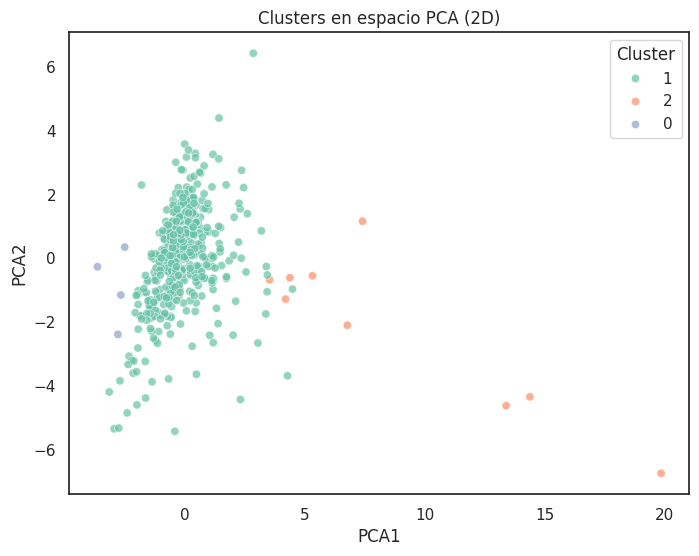

In [80]:
# Reducimos solo las numéricas a 2D
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_num_scaled_hybrid)

# Creamos DataFrame para graficar
df_plot = pd.DataFrame({
    "PCA1": X_pca[:,0],
    "PCA2": X_pca[:,1],
    "Cluster": df_hybrid["kproto3_hybrid"].astype(str)
})

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_plot, x="PCA1", y="PCA2", hue="Cluster", palette="Set2", alpha=0.7)
plt.title("Clusters en espacio PCA (2D)")
plt.legend(title="Cluster")
plt.show()

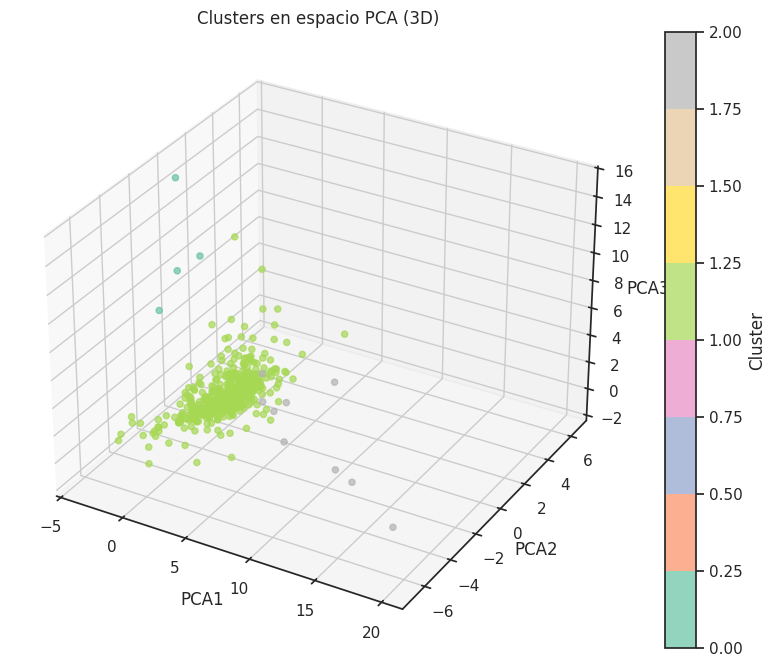

In [81]:
from mpl_toolkits.mplot3d import Axes3D

# Reducimos a 3D
pca3d = PCA(n_components=3, random_state=42)
X_pca3d = pca3d.fit_transform(X_num_scaled_hybrid)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
scatter = ax.scatter(
    X_pca3d[:,0], X_pca3d[:,1], X_pca3d[:,2],
    c=df_hybrid["kproto3_hybrid"], cmap="Set2", alpha=0.7
)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
ax.set_title("Clusters en espacio PCA (3D)")
plt.colorbar(scatter, label="Cluster")
plt.show()


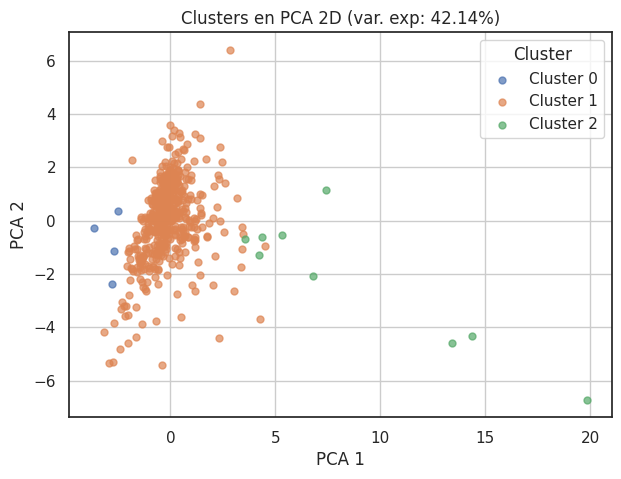

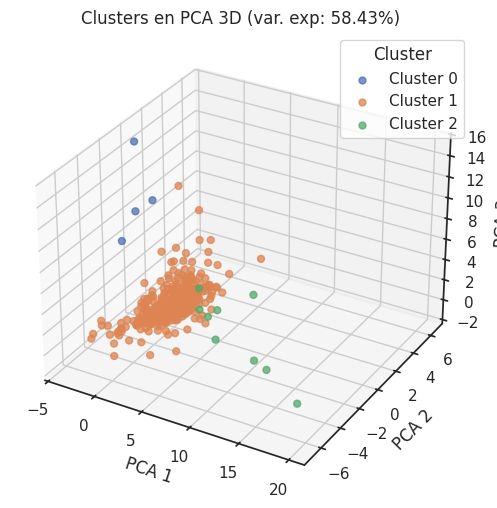

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


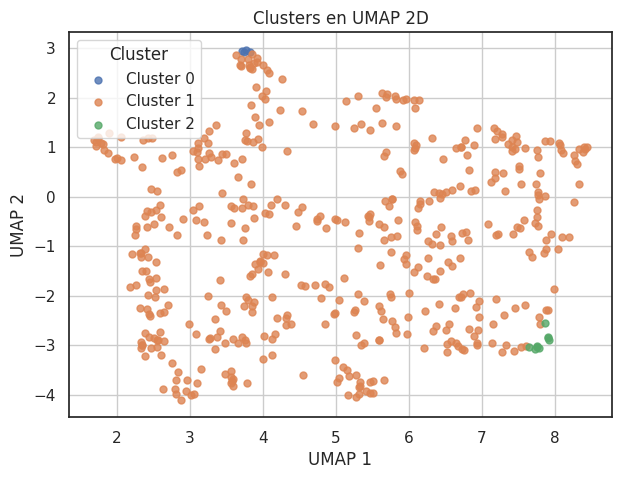

In [82]:
labels = np.asarray(df_hybrid["kproto3_hybrid"])


pca2 = PCA(n_components=2, random_state=42)
X_pca2 = pca2.fit_transform(X_num_scaled_hybrid)

plt.figure(figsize=(7,5))
for c in np.unique(labels):
    mask = labels == c
    plt.scatter(X_pca2[mask, 0], X_pca2[mask, 1], s=25, alpha=0.7, label=f"Cluster {c}")
plt.title(f"Clusters en PCA 2D (var. exp: {pca2.explained_variance_ratio_.sum():.2%})")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

from mpl_toolkits.mplot3d import Axes3D
pca3 = PCA(n_components=3, random_state=42)
X_pca3 = pca3.fit_transform(X_num_scaled_hybrid)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
for c in np.unique(labels):
    mask = labels == c
    ax.scatter(X_pca3[mask, 0], X_pca3[mask, 1], X_pca3[mask, 2], s=25, alpha=0.75, label=f"Cluster {c}")
ax.set_title(f"Clusters en PCA 3D (var. exp: {pca3.explained_variance_ratio_.sum():.2%})")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
ax.legend(title="Cluster")
plt.show()


reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X_num_scaled_hybrid)

plt.figure(figsize=(7,5))
for c in np.unique(labels):
    mask = labels == c
    plt.scatter(X_umap[mask, 0], X_umap[mask, 1], s=25, alpha=0.8, label=f"Cluster {c}")
plt.title("Clusters en UMAP 2D")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()


<Figure size 1000x600 with 0 Axes>

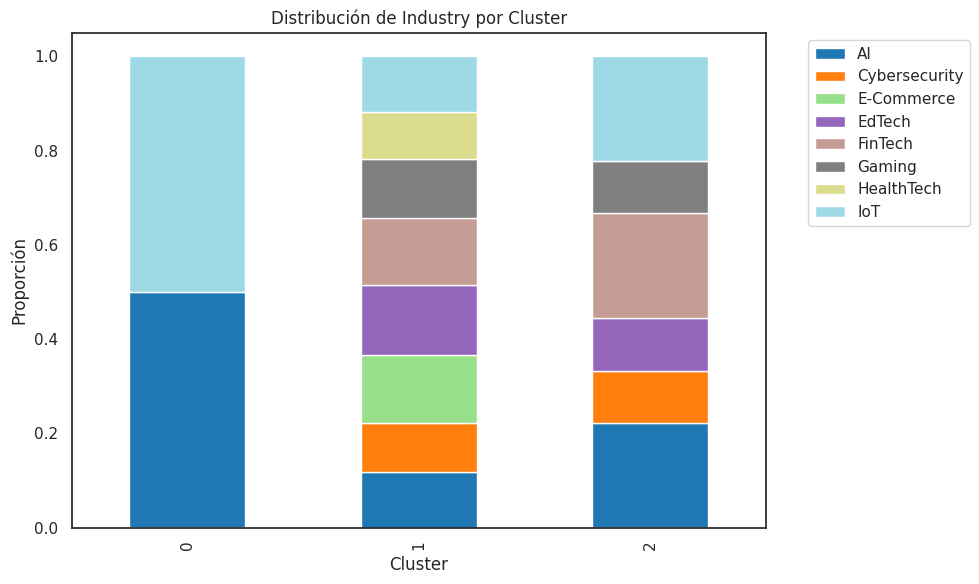

<Figure size 1000x600 with 0 Axes>

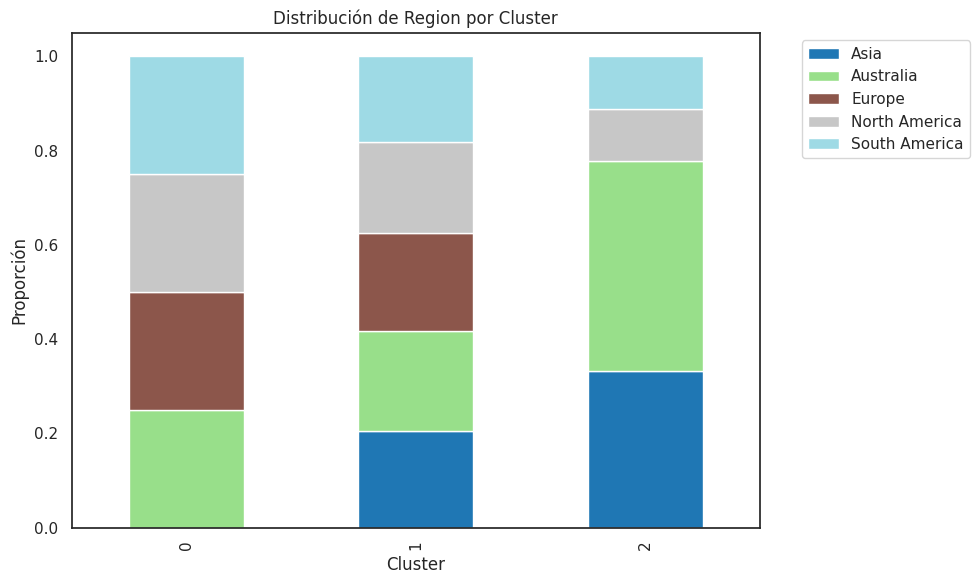

<Figure size 1000x600 with 0 Axes>

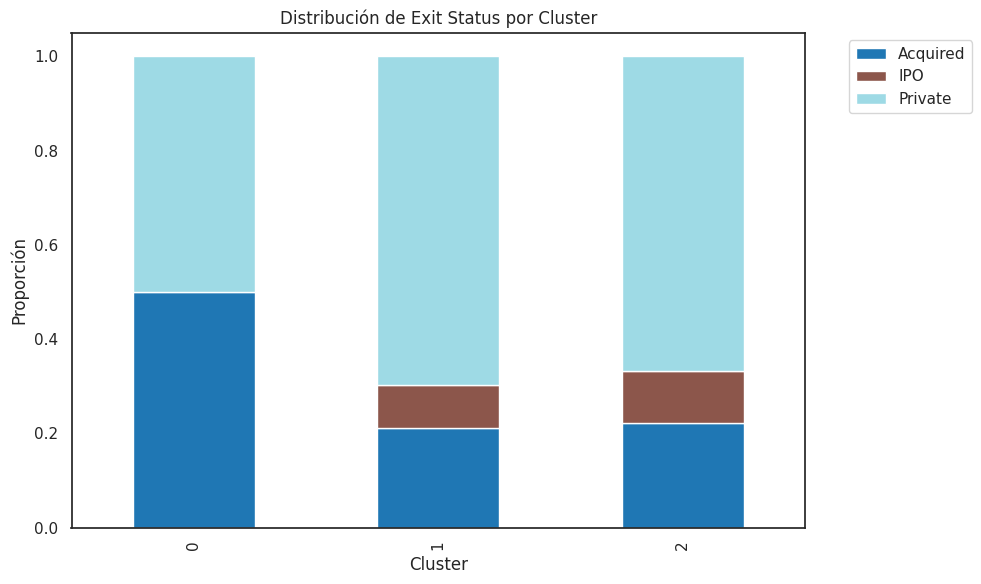

In [86]:
industry_dist = pd.crosstab(df_hybrid["kproto3_hybrid"], df_hybrid["Industry"], normalize="index")
region_dist = pd.crosstab(df_hybrid["kproto3_hybrid"], df_hybrid["Region"], normalize="index")
exit_dist = pd.crosstab(df_hybrid["kproto3_hybrid"], df_hybrid["Exit Status"], normalize="index")

def plot_cluster_distribution(dist_df, title):
    plt.figure(figsize=(10,6))
    dist_df.plot(kind="bar", stacked=True, colormap="tab20", figsize=(10,6))
    plt.title(title)
    plt.xlabel("Cluster")
    plt.ylabel("Proporción")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

plot_cluster_distribution(industry_dist, "Distribución de Industry por Cluster")
plot_cluster_distribution(region_dist, "Distribución de Region por Cluster")
plot_cluster_distribution(exit_dist, "Distribución de Exit Status por Cluster")
